# Análisis de los datos - Univariante y Bivariante

Esta parte del notebook realiza un estudio en profundidad de los datos, variables tanto categóricas como numéricas.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

In [14]:
DATA_PATH = "variables_seleccionadas.csv"  # <-- cambia si hace falta
df_raw = pd.read_csv(DATA_PATH)

print("Shape:", df_raw.shape)
display(df_raw.head())

Shape: (163, 59)


,FN,edad,imc,f_diag,fecha_de_recidi,tipo_histologico,Grado,ecotv_infiltsub,ecotv_infiltobj,infiltracion_mi,metasta_distan,grupo_riesgo,estadiaje_pre_i,tto_NA,tto_1_quirugico,fecha_qx,asa,histo_defin,grado_histologi,tamano_tumoral,afectacion_linf,AP_centinela_pelvico,AP_ganPelv,AP_glanPaor,recep_est_porcent,rece_de_Ppor,estudio_genetico_r01,estudio_genetico_r02,estudio_genetico_r03,estudio_genetico_r04,estudio_genetico_r05,estudio_genetico_r06,estadificacion_,FIGO2023,grupo_de_riesgo_definitivo,Tributaria_a_Radioterapia,bqt,qt,Ultima_fecha,visita_control,est_pcte,causa_muerte,f_muerte,libre_enferm,recidiva,numero_de_recid,dx_recidiva,num_recidiva,loc_recidiva_r01,loc_recidiva_r02,loc_recidiva_r03,loc_recidiva_r04,loc_recidiva_r05,loc_recidiva_r06,tto_recidiva,Tt_recidiva_qx,Reseccion_macroscopica_complet,Tratamiento_RT,Tratamiento_sistemico
0,12/10/1955,68.0000,39.4000,2023-11-03,NaN,2,2,2.0000,4.0000,NaN,1.0000,3.0000,2.0000,0,1.0000,16/11/2023,2.0000,2.0000,2.0000,NaN,NaN,4.0000,NaN,NaN,80.0000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,9.0000,14.0000,5.0000,0.0000,0.0000,1.0000,2025-07-21,21/07/2025,1,NaN,NaN,0,0,0.0000,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN
1,24/09/1926,92.0000,24.1400,2019-10-24,NaN,1,1,4.0000,3.0000,NaN,0.0000,1.0000,NaN,0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-24,24/06/2020,2,1.0000,08/04/2021,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26/11/1947,72.0000,38.8000,2020-07-16,NaN,2,1,4.0000,3.0000,1.0000,0.0000,1.0000,0.0000,0,1.0000,14/09/2020,2.0000,2.0000,1.0000,2.0000,1.0000,4.0000,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2025-05-20,20/05/2025,1,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/10/1942,78.0000,36.3000,2021-02-22,22/11/2023,2,1,3.0000,3.0000,2.0000,0.0000,2.0000,1.0000,0,1.0000,18/03/2021,1.0000,2.0000,1.0000,7.0000,1.0000,4.0000,3.0000,3.0000,90.0000,90.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,7.0000,11.0000,5.0000,1.0000,1.0000,1.0000,2023-11-22,27/10/2025,1,NaN,NaN,1,1,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,NaN,1.0000,0.0000
4,06/07/1951,68.0000,31.1000,2019-11-15,NaN,2,1,3.0000,NaN,1.0000,0.0000,1.0000,0.0000,0,1.0000,13/12/2019,1.0000,2.0000,1.0000,5.0000,0.0000,4.0000,NaN,NaN,90.0000,90.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2025-02-13,13/02/2025,1,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# =========================
# 2) Tipos definidos a mano
# =========================
variables_fecha = [
    'FN',                  # Fecha Nacimiento
    'f_diag',              # Fecha Diagnóstico
    'fecha_de_recidi',     # Fecha Recidiva
    'fecha_qx',            # Fecha Cirugía
    'Ultima_fecha',        # Última fecha de contacto (Opción A)
    'visita_control',      # Última fecha de contacto (Opción B)
    'f_muerte'             # Fecha Muerte
]

variables_numericas = [
    'edad',
    'imc',
    'tamano_tumoral',      # Tamaño en cm
    'recep_est_porcent',   # Porcentaje receptores estrógenos
    'rece_de_Ppor',        # Porcentaje receptores progesterona
    'numero_de_recid',     # Conteo de recidivas
    'num_recidiva'         # Número de la recidiva actual
]

variables_categoricas = [
    # --- Características del Paciente y Tumor ---
    'tipo_histologico',
    'Grado',               # Aunque es 1,2,3, se comporta como categoría ordinal
    'ecotv_infiltsub',
    'ecotv_infiltobj',
    'infiltracion_mi',
    'metasta_distan',
    'grupo_riesgo',
    'estadiaje_pre_i',
    'asa',                 # Score ASA (1-4), categórico ordinal
    'histo_defin',
    'grado_histologi',
    'afectacion_linf',

    # --- Ganglios y Genética ---
    'AP_centinela_pelvico',
    'AP_ganPelv',
    'AP_glanPaor',
    'estudio_genetico_r01',
    'estudio_genetico_r02',
    'estudio_genetico_r03',
    'estudio_genetico_r04',
    'estudio_genetico_r05',
    'estudio_genetico_r06',

    # --- Clasificación y Estadios ---
    'estadificacion_',
    'FIGO2023',
    'grupo_de_riesgo_definitivo',

    # --- Tratamientos (Sí/No o Tipo) ---
    'tto_NA',
    'tto_1_quirugico',
    'Tributaria_a_Radioterapia',
    'bqt',                 # Braquiterapia
    'qt',                  # Quimioterapia

    # --- Estado y Seguimiento ---
    'est_pcte',            # Vivo/Muerto
    'causa_muerte',
    'libre_enferm',

    # --- Recidiva (Detalles) ---
    'recidiva',            # Sí/No
    'dx_recidiva',
    'loc_recidiva_r01',    # Localización 1
    'loc_recidiva_r02',
    'loc_recidiva_r03',
    'loc_recidiva_r04',
    'loc_recidiva_r05',
    'loc_recidiva_r06',

    # --- Tratamiento de Recidiva ---
    'tto_recidiva',
    'Tt_recidiva_qx',
    'Reseccion_macroscopica_complet',
    'Tratamiento_RT',
    'Tratamiento_sistemico'
]

# =========================
# 2.1) Aplicar a df y filtrar a columnas existentes
# =========================
df = df_raw.copy()

cols_present = set(df.columns)
date_cols = [c for c in variables_fecha if c in cols_present]
num_cols = [c for c in variables_numericas if c in cols_present]
cat_cols = [c for c in variables_categoricas if c in cols_present]

# Cualquier columna que no esté en ninguna lista queda en "otras"
assigned = set(date_cols) | set(num_cols) | set(cat_cols)
other_cols = [c for c in df.columns if c not in assigned]

print("Columnas presentes por tipo:")
print(" - fechas:", len(date_cols), date_cols)
print(" - numéricas:", len(num_cols), num_cols)
print(" - categóricas:", len(cat_cols), cat_cols)
print(" - otras (no tipadas):", len(other_cols))

# =========================
# 2.2) Parseo de fechas (dayfirst True por defecto)
# =========================
def try_parse_datetime(series: pd.Series) -> pd.Series:
    # Probamos dayfirst True y False y nos quedamos con el que parsea más
    d1 = pd.to_datetime(series, errors="coerce", dayfirst=True, infer_datetime_format=True)
    d2 = pd.to_datetime(series, errors="coerce", dayfirst=False, infer_datetime_format=True)
    return d2 if d2.notna().sum() > d1.notna().sum() else d1

parsed_info = []
for c in date_cols:
    if df[c].dtype == "object":
        parsed = try_parse_datetime(df[c])
        df[c] = parsed
        parsed_info.append((c, int(parsed.notna().sum()), len(parsed)))

if parsed_info:
    print("\nParseo de fechas:")
    for c, n_ok, n_total in parsed_info:
        print(f" - {c}: {n_ok}/{n_total} parseadas a datetime")
else:
    print("\nNo se ha parseado ninguna columna (quizá ya venían como fecha o no existen).")

display(df.dtypes)


Columnas presentes por tipo:
 - fechas: 7 ['FN', 'f_diag', 'fecha_de_recidi', 'fecha_qx', 'Ultima_fecha', 'visita_control', 'f_muerte']
 - numéricas: 7 ['edad', 'imc', 'tamano_tumoral', 'recep_est_porcent', 'rece_de_Ppor', 'numero_de_recid', 'num_recidiva']
 - categóricas: 45 ['tipo_histologico', 'Grado', 'ecotv_infiltsub', 'ecotv_infiltobj', 'infiltracion_mi', 'metasta_distan', 'grupo_riesgo', 'estadiaje_pre_i', 'asa', 'histo_defin', 'grado_histologi', 'afectacion_linf', 'AP_centinela_pelvico', 'AP_ganPelv', 'AP_glanPaor', 'estudio_genetico_r01', 'estudio_genetico_r02', 'estudio_genetico_r03', 'estudio_genetico_r04', 'estudio_genetico_r05', 'estudio_genetico_r06', 'estadificacion_', 'FIGO2023', 'grupo_de_riesgo_definitivo', 'tto_NA', 'tto_1_quirugico', 'Tributaria_a_Radioterapia', 'bqt', 'qt', 'est_pcte', 'causa_muerte', 'libre_enferm', 'recidiva', 'dx_recidiva', 'loc_recidiva_r01', 'loc_recidiva_r02', 'loc_recidiva_r03', 'loc_recidiva_r04', 'loc_recidiva_r05', 'loc_recidiva_r06', 'tt

C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\1616063289.py:110: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  d1 = pd.to_datetime(series, errors="coerce", dayfirst=True, infer_datetime_format=True)
C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\1616063289.py:111: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  d2 = pd.to_datetime(series, errors="coerce", dayfirst=False, infer_datetime_format=True)
C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\1616063289.py:110: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a 

FN                                datetime64[ns]
edad                                     float64
imc                                      float64
f_diag                            datetime64[ns]
fecha_de_recidi                   datetime64[ns]
tipo_histologico                           int64
Grado                                      int64
ecotv_infiltsub                          float64
ecotv_infiltobj                          float64
infiltracion_mi                          float64
metasta_distan                           float64
grupo_riesgo                             float64
estadiaje_pre_i                          float64
tto_NA                                     int64
tto_1_quirugico                          float64
fecha_qx                          datetime64[ns]
asa                                      float64
histo_defin                              float64
grado_histologi                          float64
tamano_tumoral                           float64
afectacion_linf     

Duplicados exactos (filas): 0


,missing_%,missing_n
AP_centinela_pelvico,19.0200,31
AP_ganPelv,66.2600,108
AP_glanPaor,80.3700,131
FIGO2023,12.8800,21
FN,0.6100,1
Grado,0.0000,0
Reseccion_macroscopica_complet,83.4400,136
Tratamiento_RT,82.8200,135
Tratamiento_sistemico,82.2100,134
Tributaria_a_Radioterapia,4.9100,8


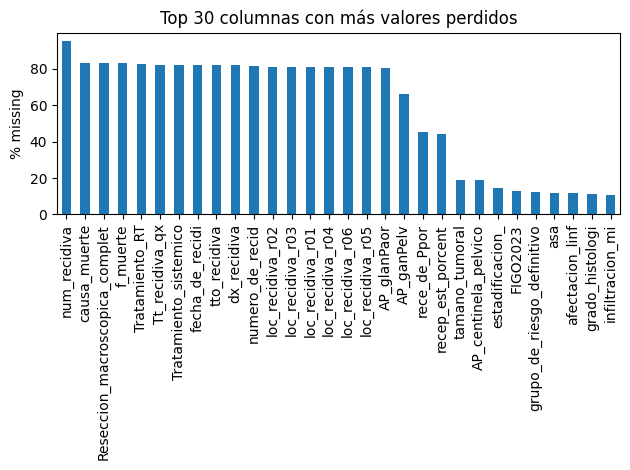

In [16]:
missing = df.isna().mean().sort_values(ascending=False)
missing_tbl = pd.DataFrame({
    "missing_%": (missing * 100).round(2),
    "missing_n": df.isna().sum()
})

dup_n = df.duplicated().sum()
print("Duplicados exactos (filas):", dup_n)

display(missing_tbl.head(30))

plt.figure()
missing_tbl["missing_%"].sort_values(ascending=False).head(30).plot(kind="bar")
plt.ylabel("% missing")
plt.title("Top 30 columnas con más valores perdidos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4) Análisis univariante

### 4.1 Objetivo `recidiva`

,count,prop
recidiva,,
0,125,0.7669
1,29,0.1779
2,9,0.0552


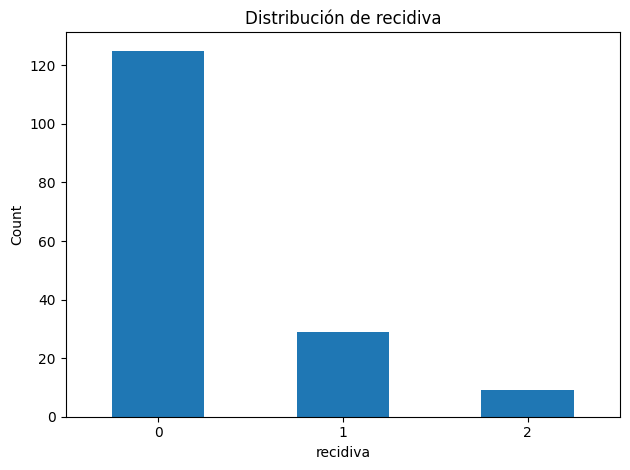

In [17]:
vc = df["recidiva"].value_counts(dropna=False)
prop = (vc / len(df)).round(4)
display(pd.DataFrame({"count": vc, "prop": prop}))

plt.figure()
vc.plot(kind="bar")
plt.title("Distribución de recidiva")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 4.2 Numéricas: histogramas + boxplots + resumen

,col,n,missing_%,mean,std,min,p25,median,p75,max
6,num_recidiva,8,95.0900,1.7500,0.4629,1.0000,1.7500,2.0000,2.0000,2.0000
5,numero_de_recid,30,81.6000,1.1333,0.4342,0.0000,1.0000,1.0000,1.0000,2.0000
4,rece_de_Ppor,89,45.4000,69.5281,30.6713,0.0000,60.0000,80.0000,90.0000,100.0000
3,recep_est_porcent,91,44.1700,76.3297,27.0576,0.0000,70.0000,90.0000,90.0000,100.0000
2,tamano_tumoral,132,19.0200,3.8299,4.5518,0.0000,1.7500,3.0000,4.0000,38.0000
1,imc,155,4.9100,30.7263,7.7389,16.7000,24.4000,29.4000,35.3000,56.1000
0,edad,163,0.0000,62.1902,14.5244,0.0000,54.0000,63.0000,72.0000,92.0000


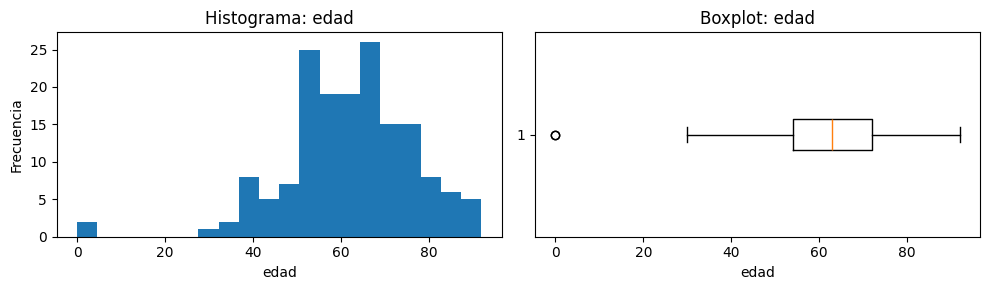

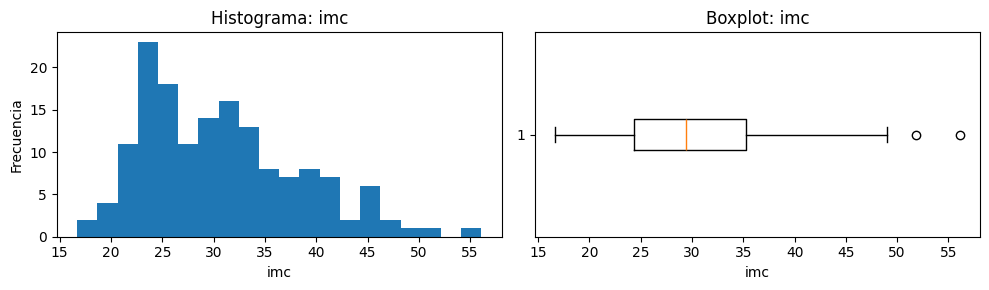

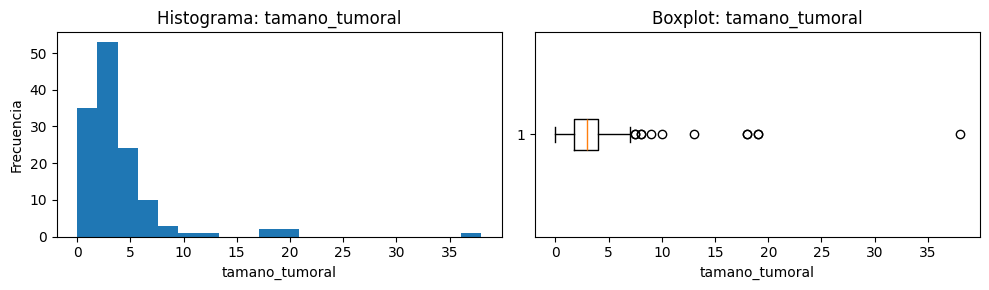

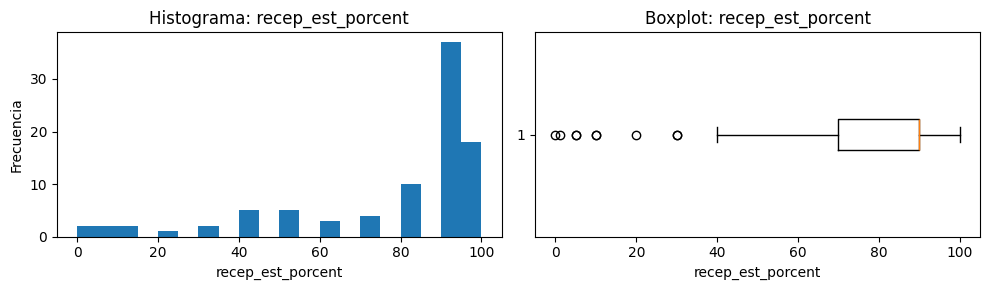

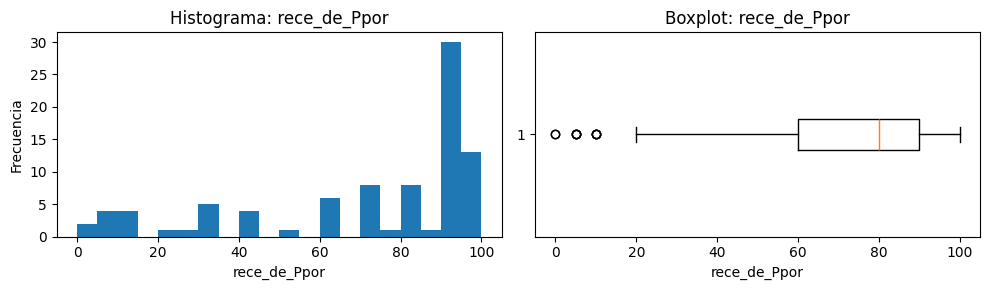

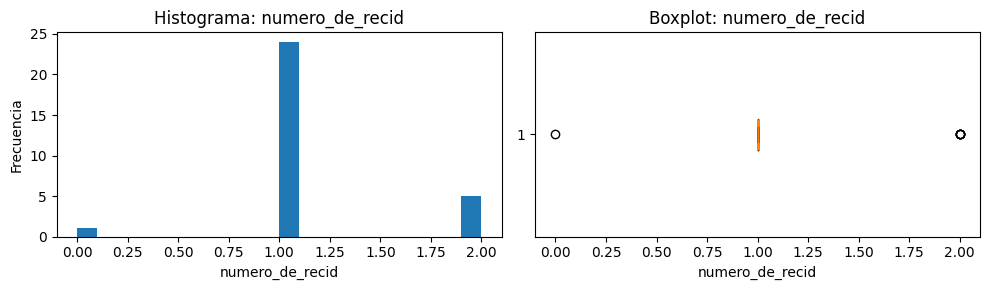

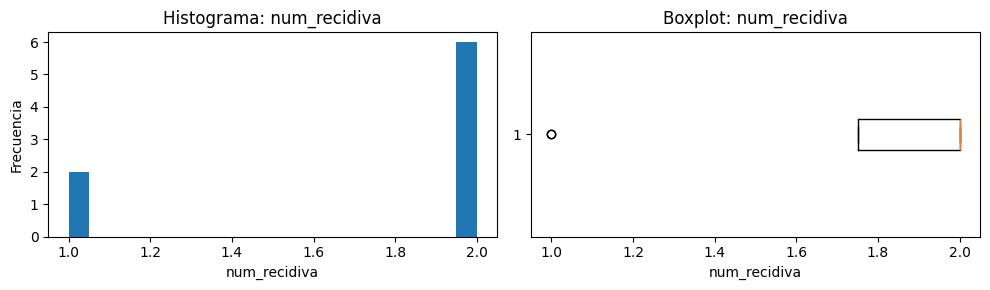

In [18]:
def plot_univariate_numeric(s: pd.Series, name: str):
    x = s.dropna()
    if x.empty:
        return

    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    axes[0].hist(x, bins=20)
    axes[0].set_title(f"Histograma: {name}")
    axes[0].set_xlabel(name)
    axes[0].set_ylabel("Frecuencia")

    axes[1].boxplot(x, vert=False)
    axes[1].set_title(f"Boxplot: {name}")
    axes[1].set_xlabel(name)

    plt.tight_layout()
    plt.show()

num_summary = []
for c in num_cols:
    s = df[c]
    num_summary.append({
        "col": c,
        "n": int(s.notna().sum()),
        "missing_%": float((s.isna().mean() * 100).round(2)),
        "mean": float(s.mean(skipna=True)) if s.notna().any() else np.nan,
        "std": float(s.std(skipna=True)) if s.notna().any() else np.nan,
        "min": float(s.min(skipna=True)) if s.notna().any() else np.nan,
        "p25": float(s.quantile(0.25)) if s.notna().any() else np.nan,
        "median": float(s.median(skipna=True)) if s.notna().any() else np.nan,
        "p75": float(s.quantile(0.75)) if s.notna().any() else np.nan,
        "max": float(s.max(skipna=True)) if s.notna().any() else np.nan,
    })

num_summary_df = pd.DataFrame(num_summary).sort_values("missing_%", ascending=False)
display(num_summary_df)

for c in num_cols:
    plot_univariate_numeric(df[c], c)

### 4.3 Categóricas: frecuencias (top-K) + barras

,count,prop
tipo_histologico,,
1,16,0.0982
2,121,0.7423
3,4,0.0245
4,4,0.0245
5,1,0.0061
7,2,0.0123
8,4,0.0245
9,3,0.0184
10,4,0.0245


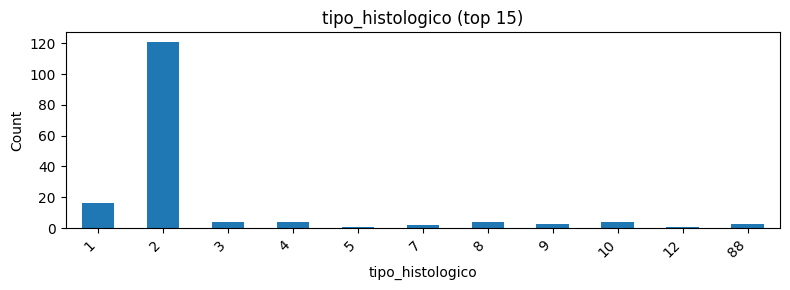

,count,prop
Grado,,
1,132,0.8098
2,31,0.1902


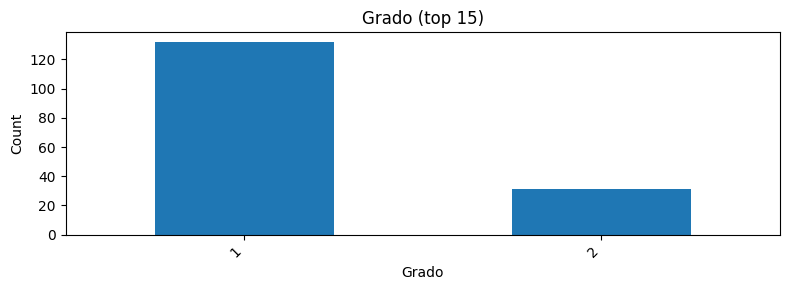

,count,prop
ecotv_infiltsub,,
1.0000,9,0.0552
2.0000,72,0.4417
3.0000,51,0.3129
4.0000,30,0.1840
NaN,1,0.0061


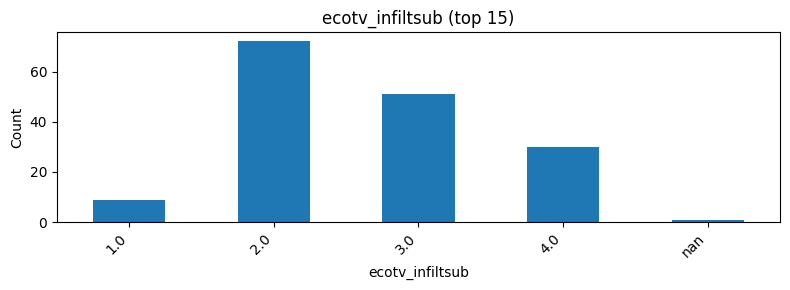

,count,prop
ecotv_infiltobj,,
1.0000,16,0.0982
2.0000,23,0.1411
3.0000,11,0.0675
4.0000,107,0.6564
NaN,6,0.0368


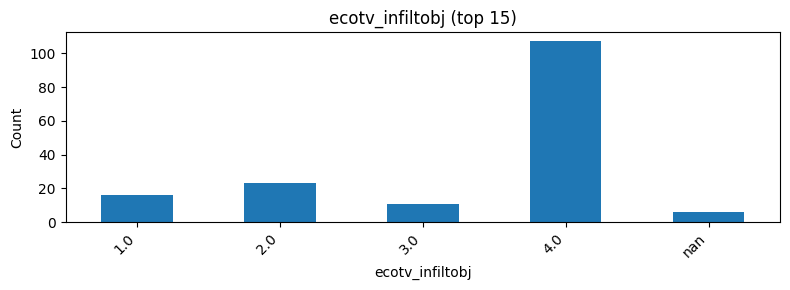

,count,prop
infiltracion_mi,,
0.0000,39,0.2393
1.0000,62,0.3804
2.0000,39,0.2393
3.0000,6,0.0368
NaN,17,0.1043


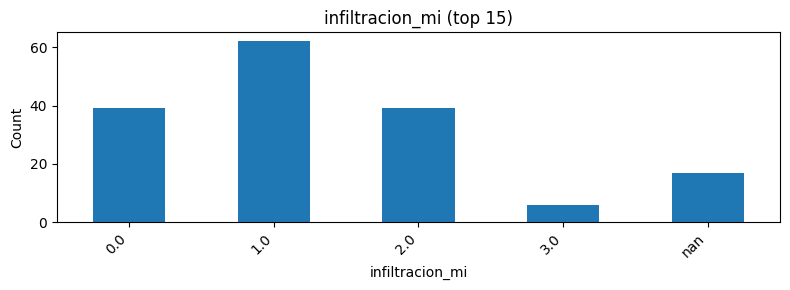

,count,prop
metasta_distan,,
0.0000,150,0.9202
1.0000,9,0.0552
NaN,4,0.0245


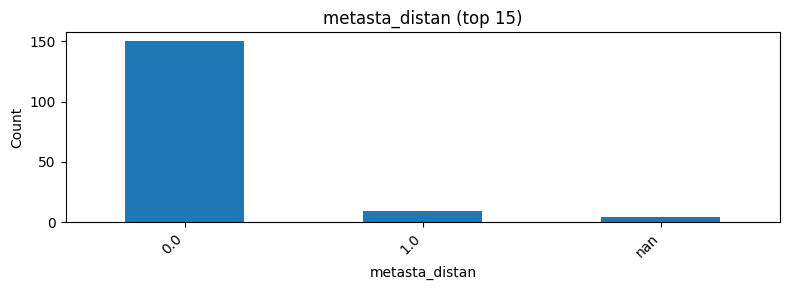

,count,prop
grupo_riesgo,,
1.0000,100,0.6135
2.0000,39,0.2393
3.0000,22,0.1350
NaN,2,0.0123


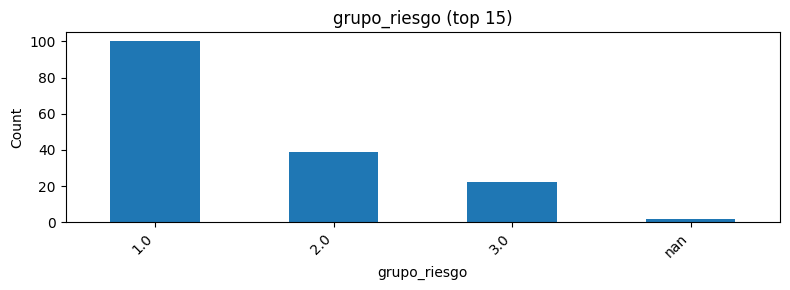

,count,prop
estadiaje_pre_i,,
0.0000,125,0.7669
1.0000,11,0.0675
2.0000,24,0.1472
NaN,3,0.0184


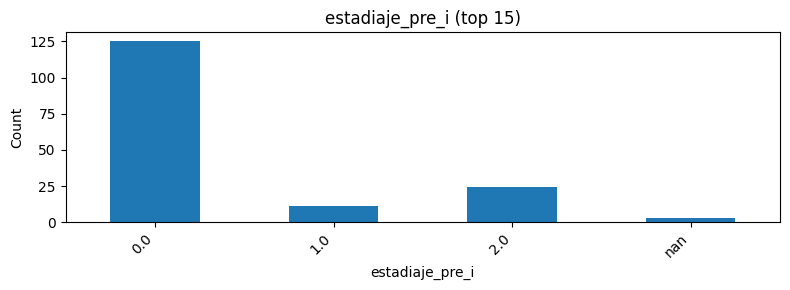

,count,prop
asa,,
0.0000,9,0.0552
1.0000,98,0.6012
2.0000,37,0.2270
NaN,19,0.1166


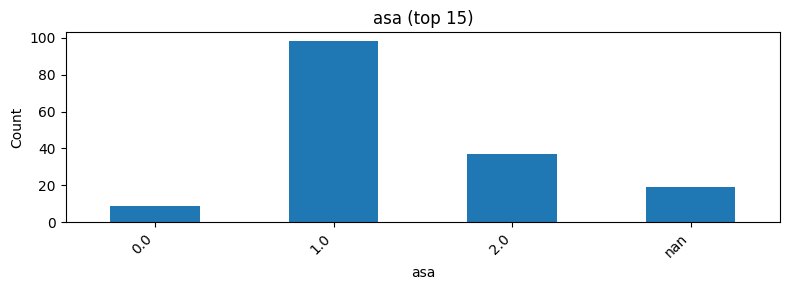

,count,prop
histo_defin,,
1.0000,5,0.0307
2.0000,119,0.7301
3.0000,5,0.0307
4.0000,2,0.0123
5.0000,1,0.0061
6.0000,3,0.0184
7.0000,1,0.0061
8.0000,4,0.0245
9.0000,11,0.0675


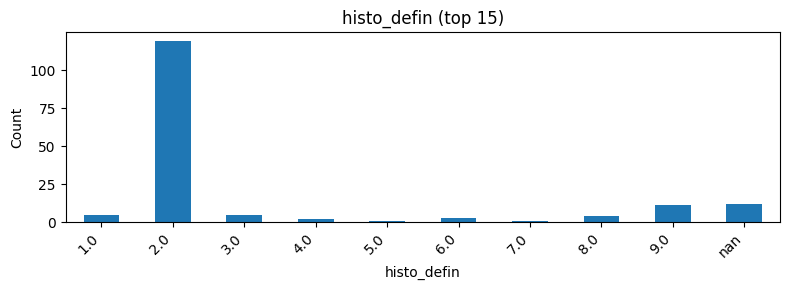

,count,prop
grado_histologi,,
1.0000,115,0.7055
2.0000,30,0.1840
NaN,18,0.1104


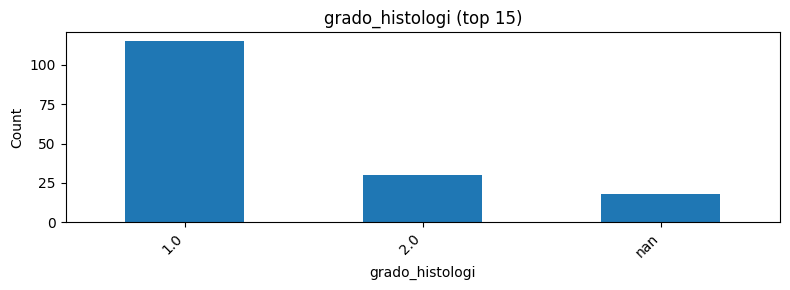

,count,prop
afectacion_linf,,
0.0000,114,0.6994
1.0000,30,0.1840
NaN,19,0.1166


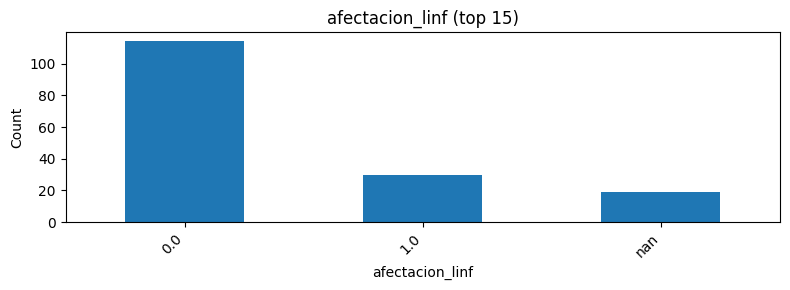

,count,prop
AP_centinela_pelvico,,
0.0000,37,0.2270
1.0000,2,0.0123
2.0000,1,0.0061
3.0000,1,0.0061
4.0000,91,0.5583
NaN,31,0.1902


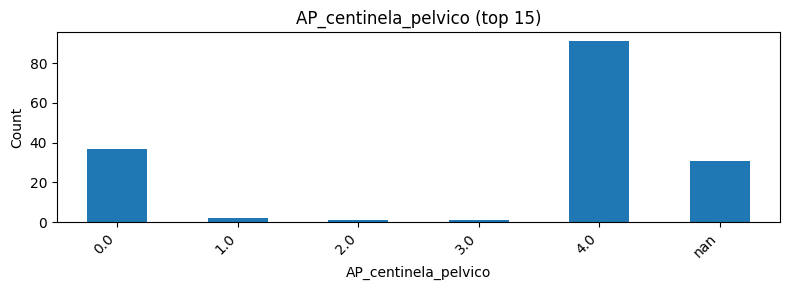

,count,prop
AP_ganPelv,,
0.0000,44,0.2699
1.0000,1,0.0061
3.0000,10,0.0613
NaN,108,0.6626


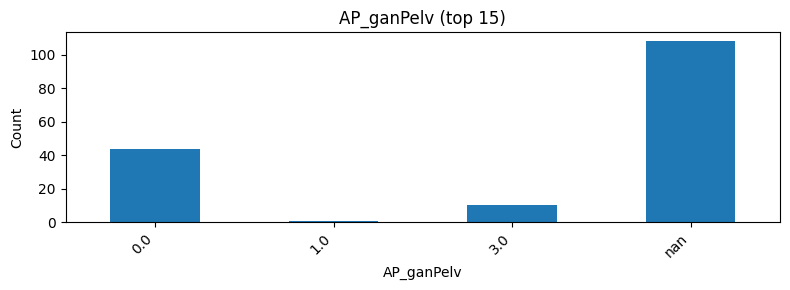

,count,prop
AP_glanPaor,,
0.0000,24,0.1472
1.0000,1,0.0061
2.0000,1,0.0061
3.0000,6,0.0368
NaN,131,0.8037


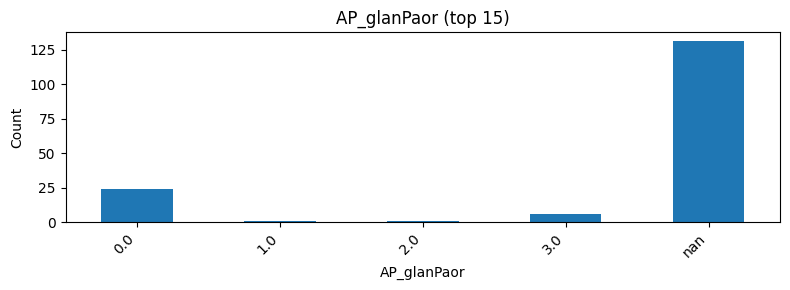

,count,prop
estudio_genetico_r01,,
0.0000,147,0.9018
1.0000,7,0.0429
NaN,9,0.0552


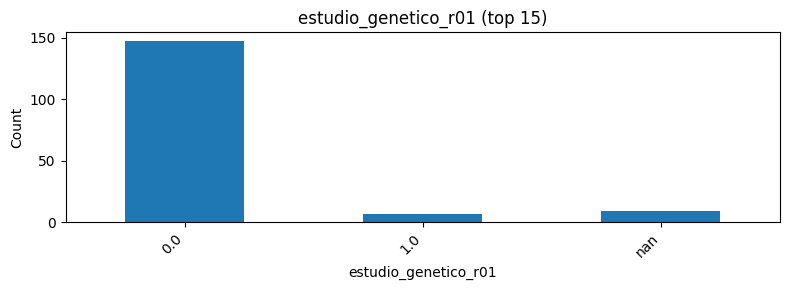

,count,prop
estudio_genetico_r02,,
0.0000,153,0.9387
1.0000,1,0.0061
NaN,9,0.0552


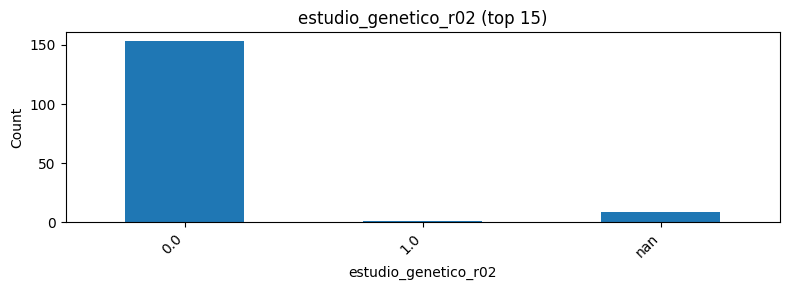

,count,prop
estudio_genetico_r03,,
0.0000,153,0.9387
1.0000,1,0.0061
NaN,9,0.0552


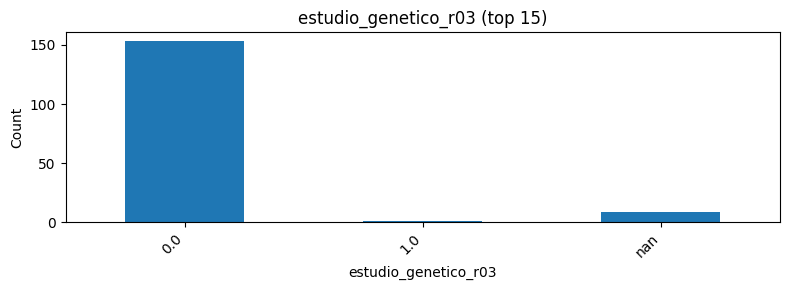

,count,prop
estudio_genetico_r04,,
0.0000,153,0.9387
1.0000,1,0.0061
NaN,9,0.0552


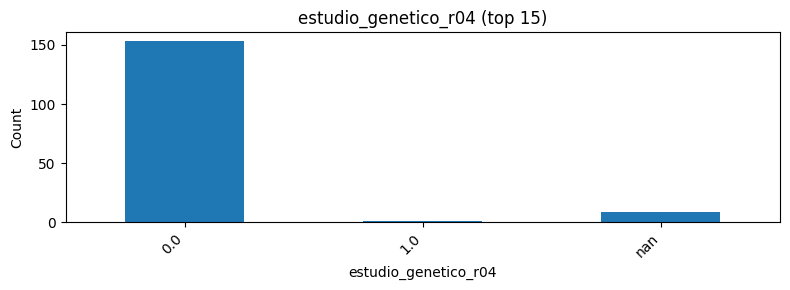

,count,prop
estudio_genetico_r05,,
0.0000,151,0.9264
1.0000,3,0.0184
NaN,9,0.0552


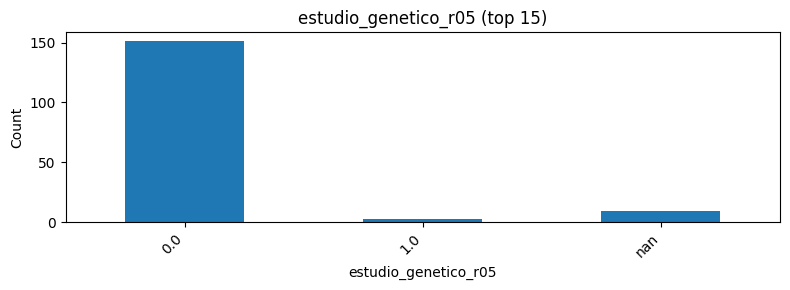

,count,prop
estudio_genetico_r06,,
0.0000,10,0.0613
1.0000,144,0.8834
NaN,9,0.0552


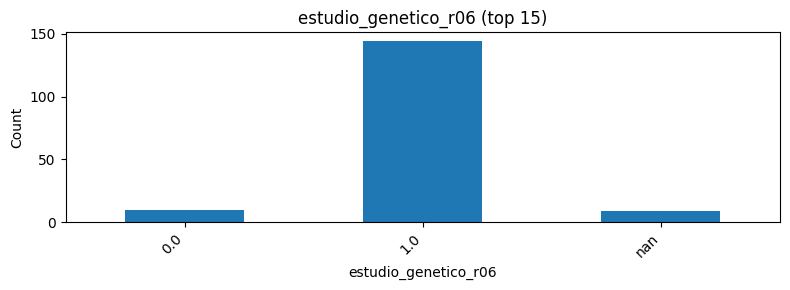

,count,prop
estadificacion_,,
1.0000,86,0.5276
2.0000,18,0.1104
3.0000,6,0.0368
4.0000,2,0.0123
5.0000,3,0.0184
6.0000,6,0.0368
7.0000,7,0.0429
8.0000,4,0.0245
9.0000,7,0.0429


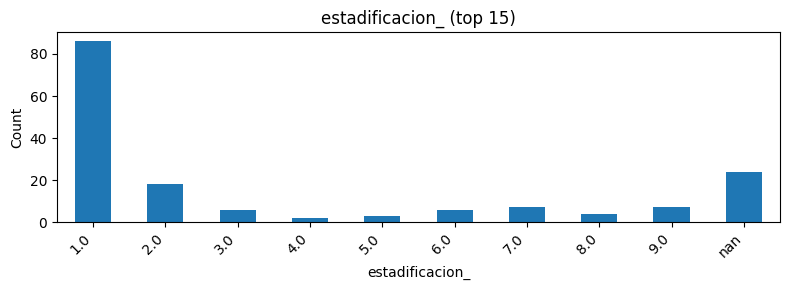

,count,prop
FIGO2023,,
1.0000,81,0.4969
2.0000,10,0.0613
4.0000,16,0.0982
6.0000,3,0.0184
7.0000,4,0.0245
8.0000,1,0.0061
9.0000,3,0.0184
10.0000,2,0.0123
11.0000,13,0.0798


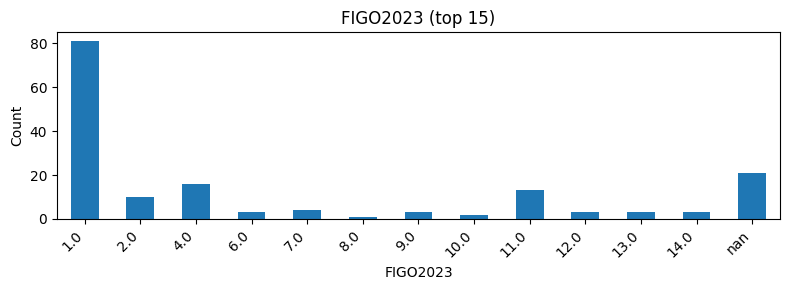

,count,prop
grupo_de_riesgo_definitivo,,
1.0000,87,0.5337
2.0000,16,0.0982
3.0000,10,0.0613
4.0000,18,0.1104
5.0000,12,0.0736
NaN,20,0.1227


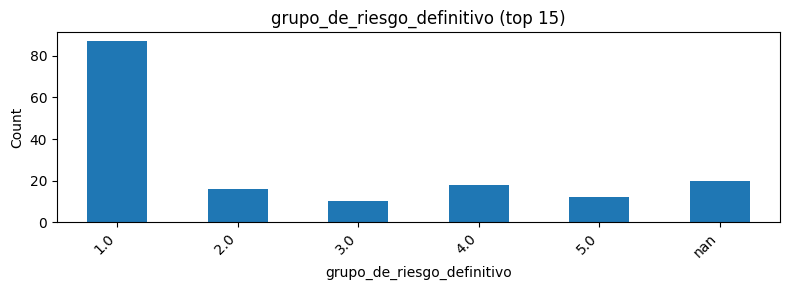

,count,prop
tto_NA,,
0,160,0.9816
1,3,0.0184


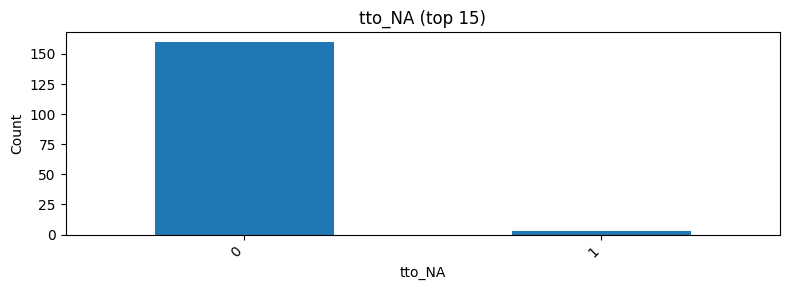

,count,prop
tto_1_quirugico,,
0.0000,22,0.1350
1.0000,137,0.8405
NaN,4,0.0245


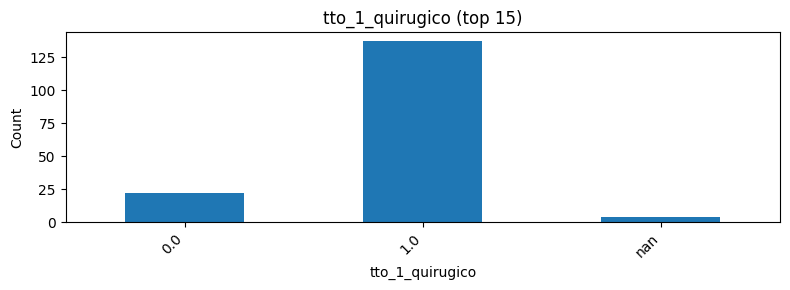

,count,prop
Tributaria_a_Radioterapia,,
0.0000,119,0.7301
1.0000,36,0.2209
NaN,8,0.0491


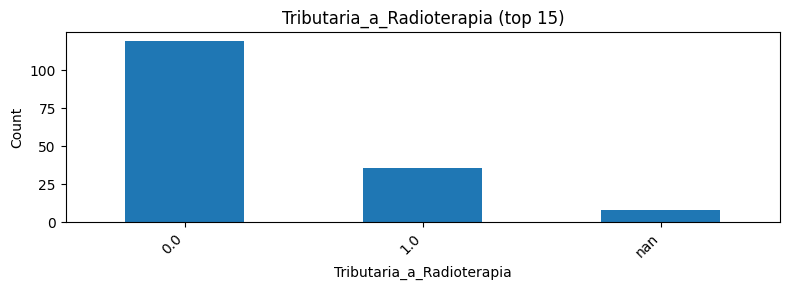

,count,prop
bqt,,
0.0000,111,0.6810
1.0000,43,0.2638
NaN,9,0.0552


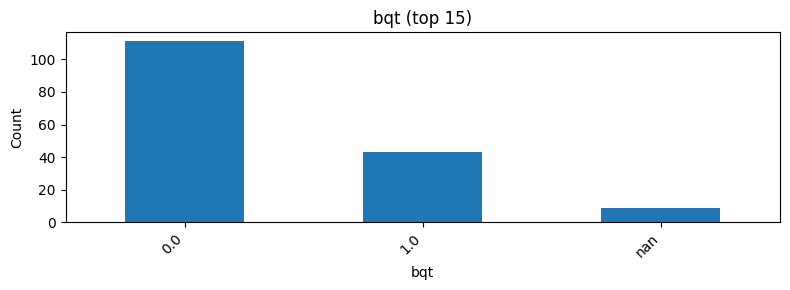

,count,prop
qt,,
0.0000,121,0.7423
1.0000,32,0.1963
NaN,10,0.0613


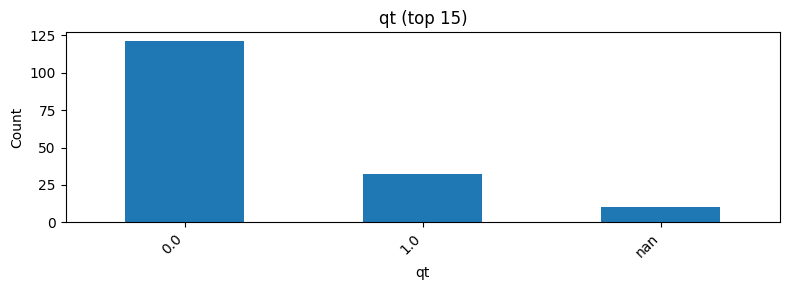

,count,prop
est_pcte,,
1,131,0.8037
2,27,0.1656
3,5,0.0307


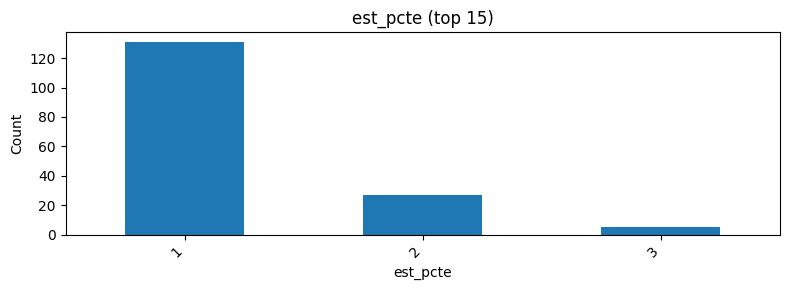

,count,prop
causa_muerte,,
0.0000,13,0.0798
1.0000,14,0.0859
NaN,136,0.8344


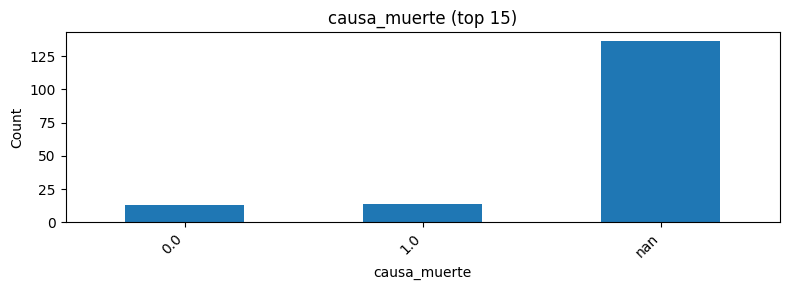

,count,prop
libre_enferm,,
0,34,0.2086
1,108,0.6626
2,21,0.1288


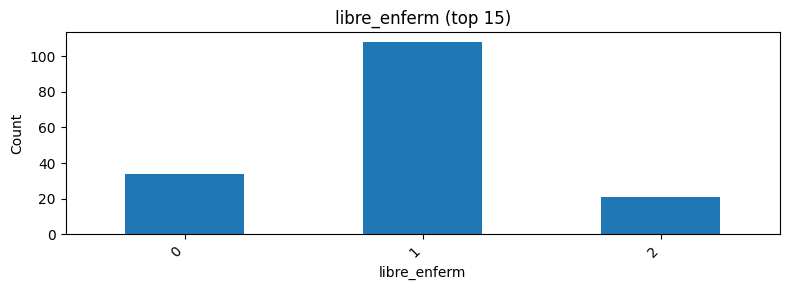

,count,prop
recidiva,,
0,125,0.7669
1,29,0.1779
2,9,0.0552


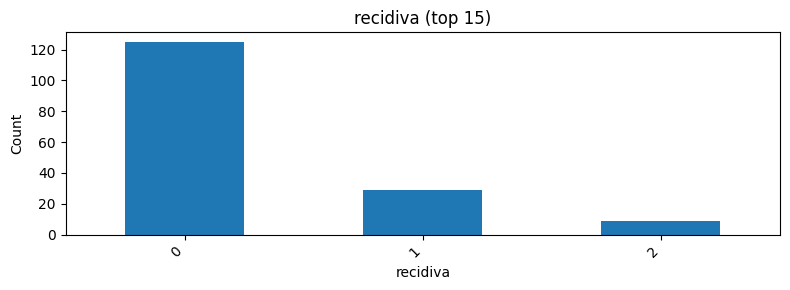

,count,prop
dx_recidiva,,
0.0000,3,0.0184
1.0000,26,0.1595
NaN,134,0.8221


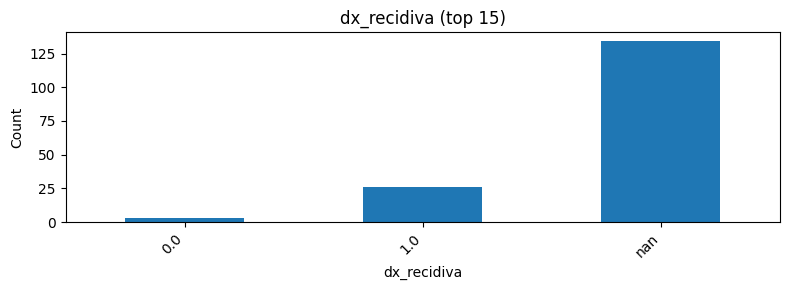

,count,prop
loc_recidiva_r01,,
0.0000,15,0.0920
1.0000,16,0.0982
NaN,132,0.8098


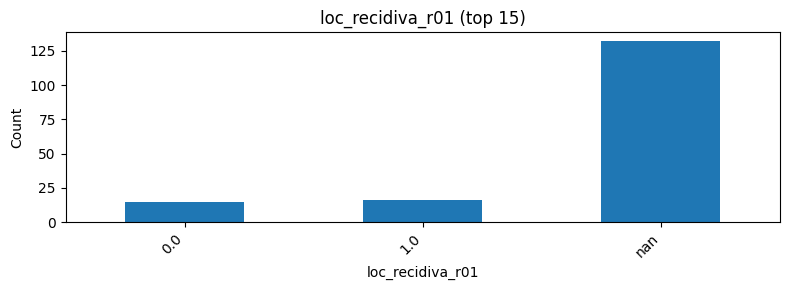

,count,prop
loc_recidiva_r02,,
0.0000,23,0.1411
1.0000,8,0.0491
NaN,132,0.8098


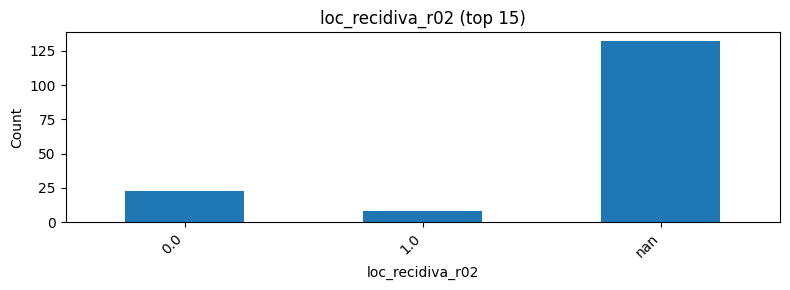

,count,prop
loc_recidiva_r03,,
0.0000,12,0.0736
1.0000,19,0.1166
NaN,132,0.8098


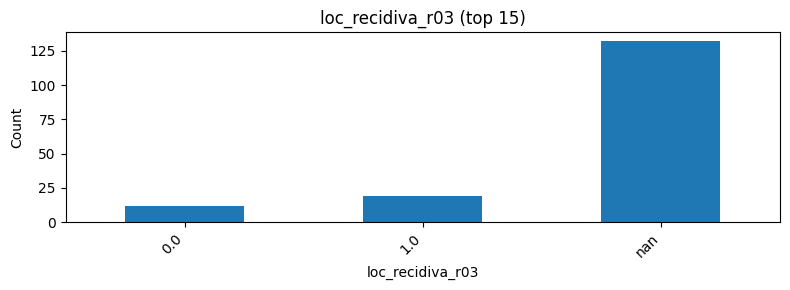

,count,prop
loc_recidiva_r04,,
0.0000,31,0.1902
NaN,132,0.8098


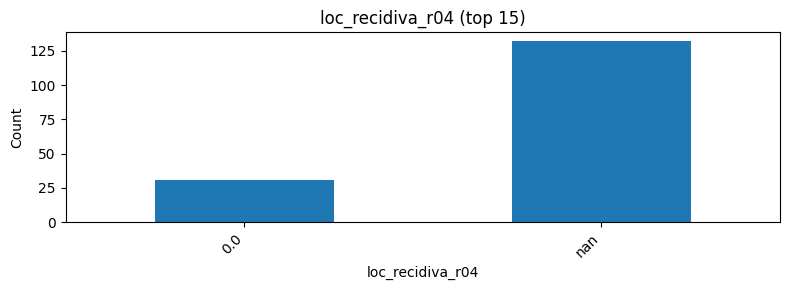

,count,prop
loc_recidiva_r05,,
0.0000,31,0.1902
NaN,132,0.8098


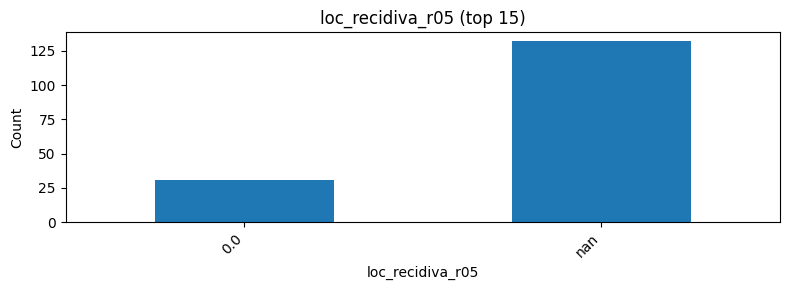

,count,prop
loc_recidiva_r06,,
0.0000,30,0.1840
1.0000,1,0.0061
NaN,132,0.8098


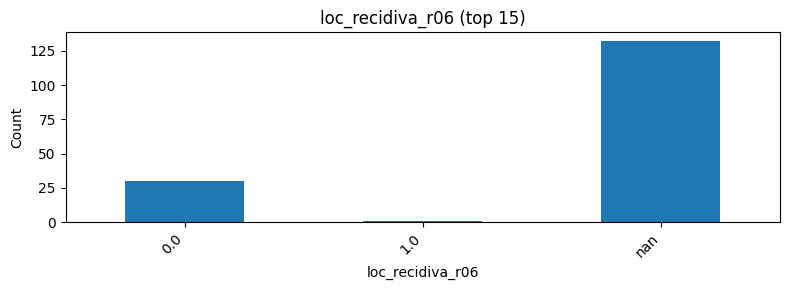

,count,prop
tto_recidiva,,
0.0000,2,0.0123
1.0000,11,0.0675
2.0000,16,0.0982
NaN,134,0.8221


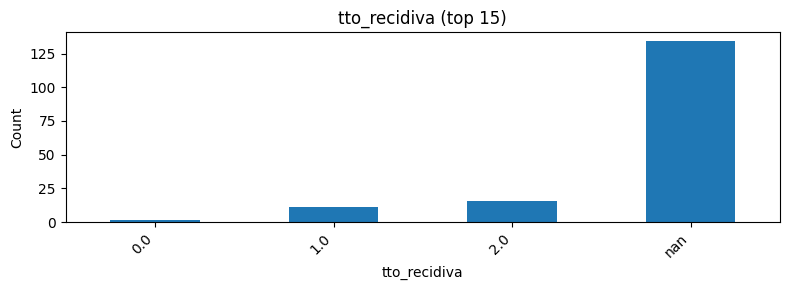

,count,prop
Tt_recidiva_qx,,
0.0000,14,0.0859
1.0000,14,0.0859
2.0000,1,0.0061
NaN,134,0.8221


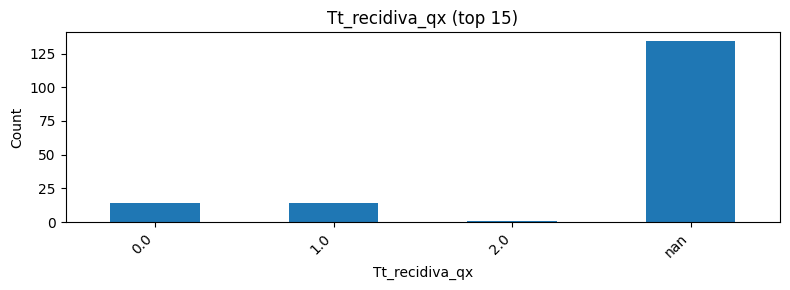

,count,prop
Reseccion_macroscopica_complet,,
0.0000,14,0.0859
1.0000,13,0.0798
NaN,136,0.8344


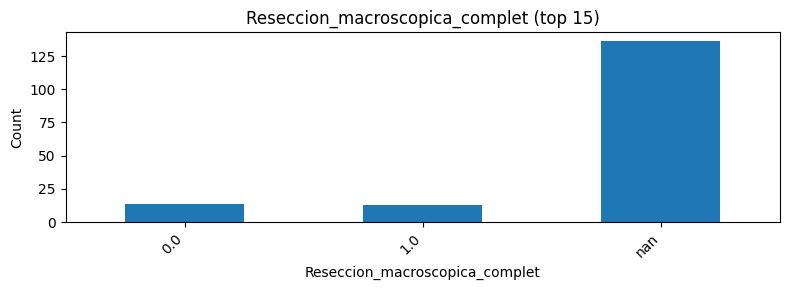

,count,prop
Tratamiento_RT,,
0.0000,20,0.1227
1.0000,8,0.0491
NaN,135,0.8282


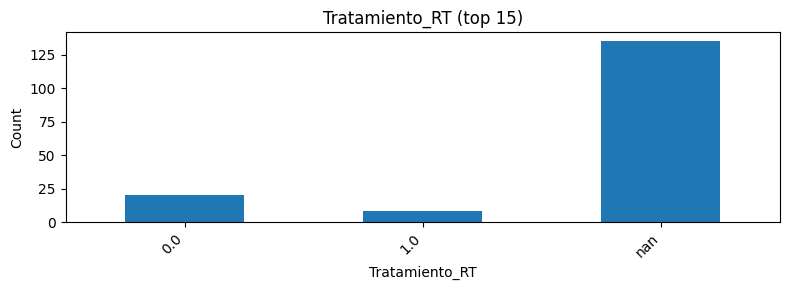

,count,prop
Tratamiento_sistemico,,
0.0000,14,0.0859
1.0000,15,0.0920
NaN,134,0.8221


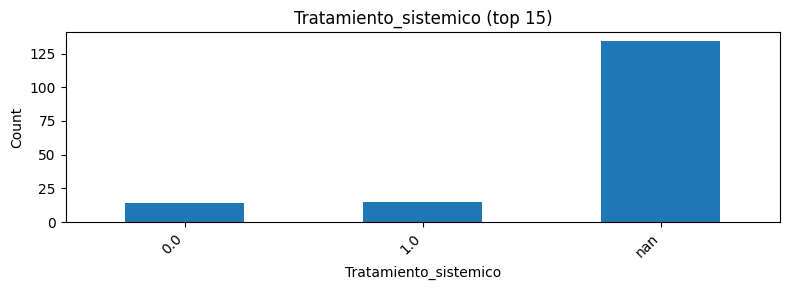

In [19]:
def plot_univariate_categorical(s: pd.Series, name: str, top_k: int = 15):
    vc = s.value_counts(dropna=False).sort_index()
    display(pd.DataFrame({"count": vc, "prop": (vc / len(s)).round(4)}).head(top_k))

    plt.figure(figsize=(8, 3))
    vc.head(top_k).plot(kind="bar")
    plt.title(f"{name} (top {top_k})")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for c in cat_cols:
    plot_univariate_categorical(df[c], c, top_k=15)

## 5) Análisis bivariante (vs `recidiva`)
- Numéricas vs recidiva: boxplot por grupo + tests y tamaño de efecto.

In [20]:
from math import sqrt

def cramers_v(confusion: pd.DataFrame) -> float:
    import scipy.stats as ss
    chi2 = ss.chi2_contingency(confusion, correction=False)[0]
    n = confusion.to_numpy().sum()
    r, k = confusion.shape
    return sqrt((chi2 / n) / (min(r-1, k-1))) if min(r-1, k-1) > 0 else np.nan

def cohen_d(x, y) -> float:
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    nx, ny = len(x), len(y)
    if nx < 2 or ny < 2:
        return np.nan
    vx, vy = x.var(ddof=1), y.var(ddof=1)
    pooled = ((nx - 1) * vx + (ny - 1) * vy) / (nx + ny - 2)
    return (x.mean() - y.mean()) / np.sqrt(pooled) if pooled > 0 else np.nan

Categorías recidiva usadas (>=5 casos): [0, 1, 2]


C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\3895719715.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(v) for v in valid_cats], vert=False)


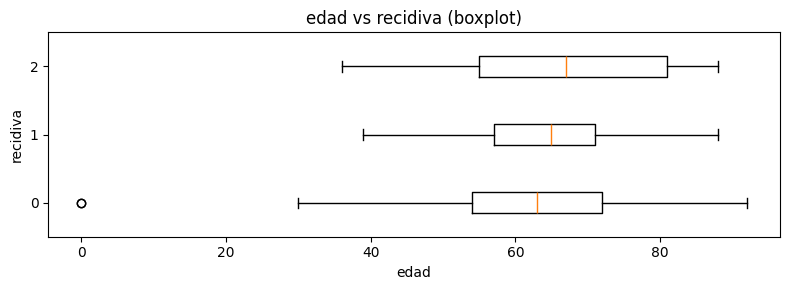

C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\3895719715.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(v) for v in valid_cats], vert=False)


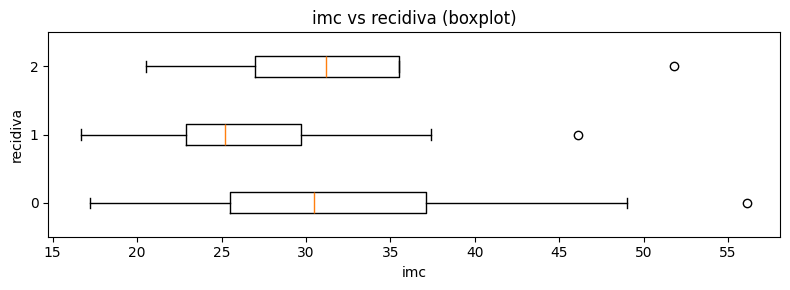

C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\3895719715.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(v) for v in valid_cats], vert=False)


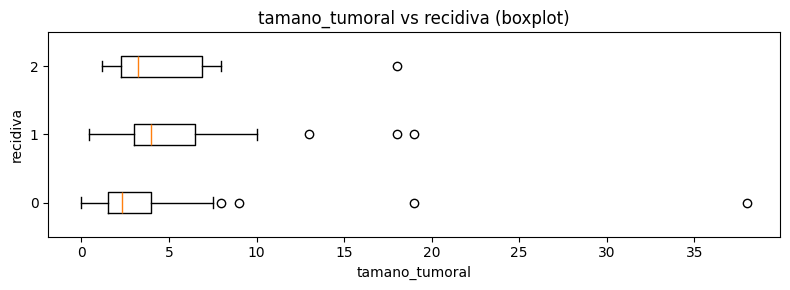

C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\3895719715.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(v) for v in valid_cats], vert=False)


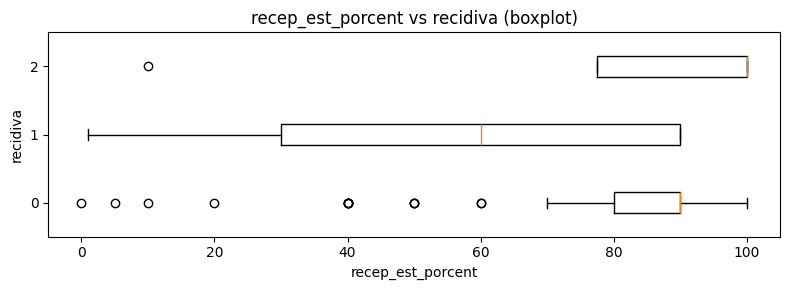

C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\3895719715.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(v) for v in valid_cats], vert=False)


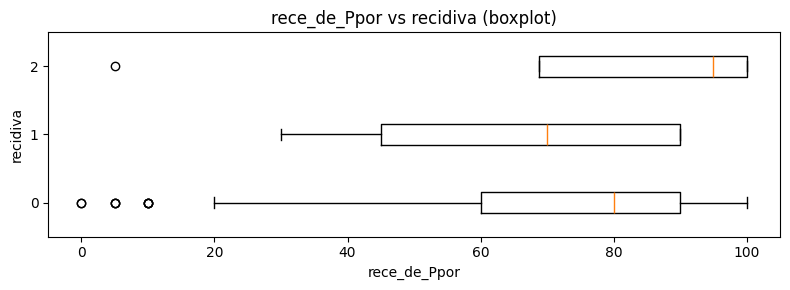

C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\3895719715.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(v) for v in valid_cats], vert=False)


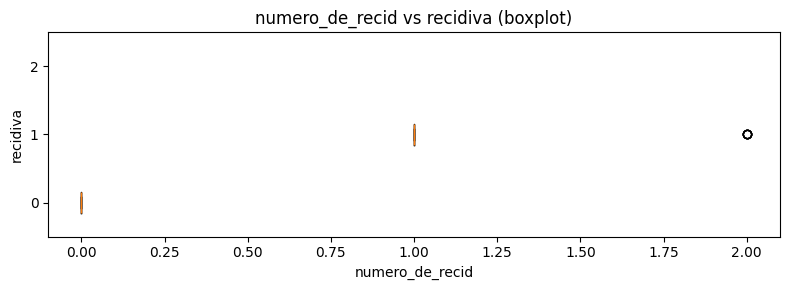

C:\Users\Joel\AppData\Local\Temp\ipykernel_23832\3895719715.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(v) for v in valid_cats], vert=False)


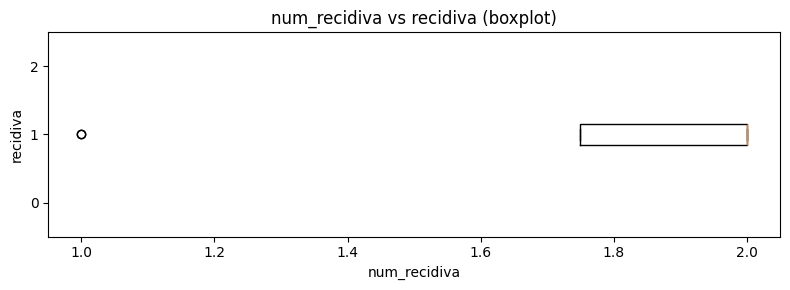

In [21]:
# 5.1 Numéricas vs recidiva

rec = df["recidiva"]
rec_counts = rec.value_counts(dropna=False)

# Solo categorías con >=5 casos para estabilidad de gráficos
valid_cats = rec_counts[rec_counts >= 5].index.tolist()
print("Categorías recidiva usadas (>=5 casos):", valid_cats)

results_num = []

for c in num_cols:
    tmp = pd.DataFrame({"recidiva": rec, c: df[c]}).dropna(subset=[c, "recidiva"])
    tmp = tmp[tmp["recidiva"].isin(valid_cats)]
    if tmp.empty:
        continue

    groups = [tmp[tmp["recidiva"] == cat][c].values for cat in valid_cats]
    plt.figure(figsize=(8, 3))
    plt.boxplot(groups, labels=[str(v) for v in valid_cats], vert=False)
    plt.title(f"{c} vs recidiva (boxplot)")
    plt.xlabel(c)
    plt.ylabel("recidiva")
    plt.tight_layout()
    plt.show()

    # Si hay exactamente 2 categorías válidas -> tests/efecto
    if len(valid_cats) == 2:
        g1 = tmp[tmp["recidiva"] == valid_cats[0]][c].dropna().values
        g2 = tmp[tmp["recidiva"] == valid_cats[1]][c].dropna().values

        try:
            from scipy.stats import ttest_ind, mannwhitneyu
            t_p = ttest_ind(g1, g2, equal_var=False, nan_policy="omit").pvalue
            mw_p = mannwhitneyu(g1, g2, alternative="two-sided").pvalue
        except Exception:
            t_p, mw_p = np.nan, np.nan

        results_num.append({
            "variable": c,
            "n_total": len(tmp),
            f"mean_{valid_cats[0]}": np.mean(g1) if len(g1) else np.nan,
            f"mean_{valid_cats[1]}": np.mean(g2) if len(g2) else np.nan,
            "cohen_d": cohen_d(g1, g2),
            "p_ttest": t_p,
            "p_mannwhitney": mw_p,
        })


recidiva,0,1,2
tipo_histologico,,,
1,15,1,0
2,100,15,6
3,2,1,1
4,2,2,0
5,1,0,0
7,0,2,0
8,1,3,0
9,0,2,1
10,1,3,0


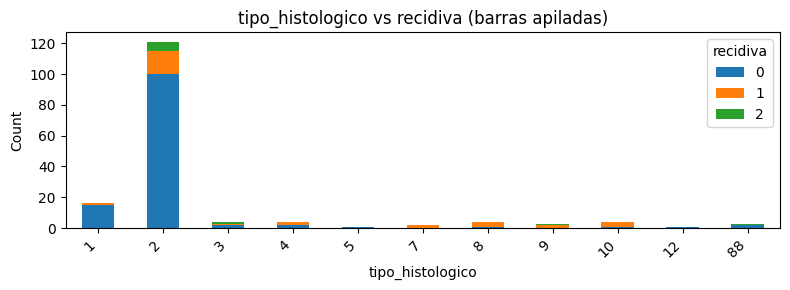

recidiva,0,1,2
Grado,,,
1,113,12,7
2,12,17,2


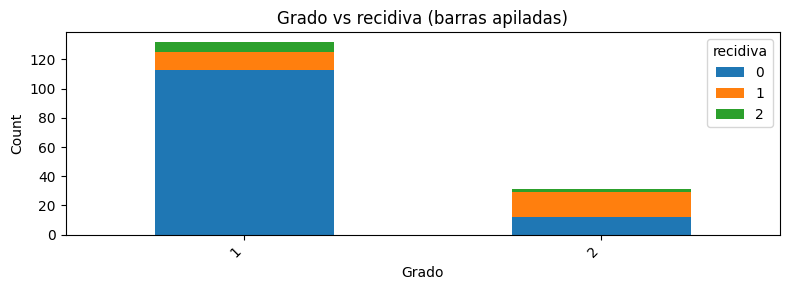

recidiva,0,1,2
ecotv_infiltsub,,,
1.0000,7,2,0
2.0000,63,7,2
3.0000,35,11,5
4.0000,19,9,2


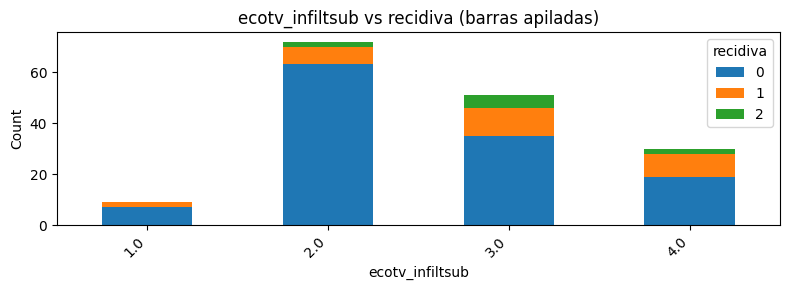

recidiva,0,1,2
ecotv_infiltobj,,,
1.0000,14,2,0
2.0000,19,3,1
3.0000,6,5,0
4.0000,80,19,8


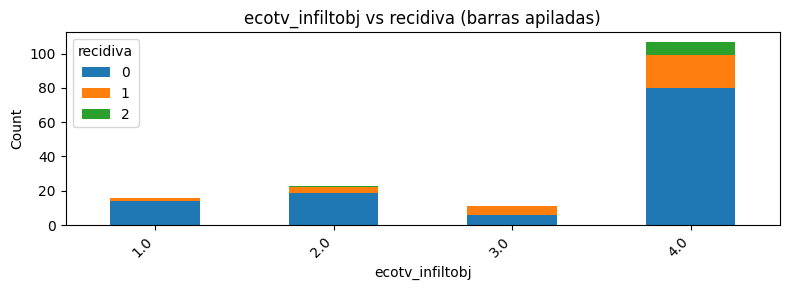

recidiva,0,1,2
infiltracion_mi,,,
0.0000,34,2,3
1.0000,54,6,2
2.0000,23,16,0
3.0000,2,4,0


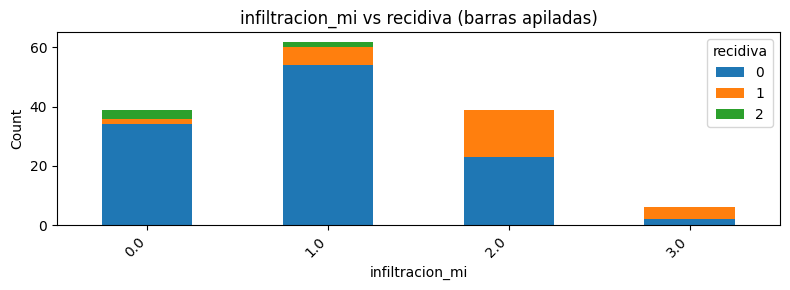

recidiva,0,1,2
metasta_distan,,,
0.0000,115,26,9
1.0000,6,3,0


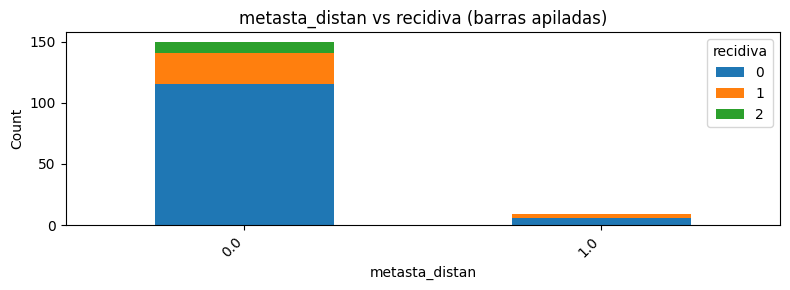

recidiva,0,1,2
grupo_riesgo,,,
1.0000,90,6,4
2.0000,25,10,4
3.0000,9,12,1


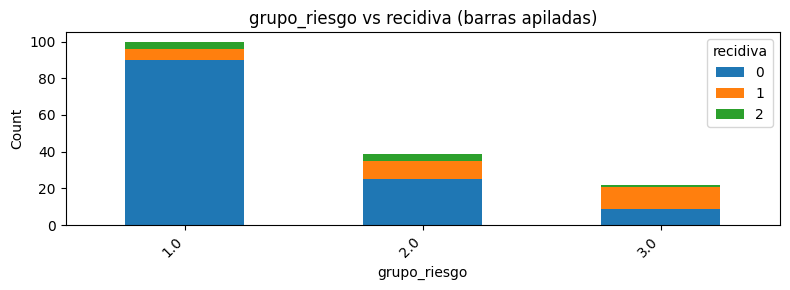

recidiva,0,1,2
estadiaje_pre_i,,,
0.0000,106,13,6
1.0000,4,5,2
2.0000,13,10,1


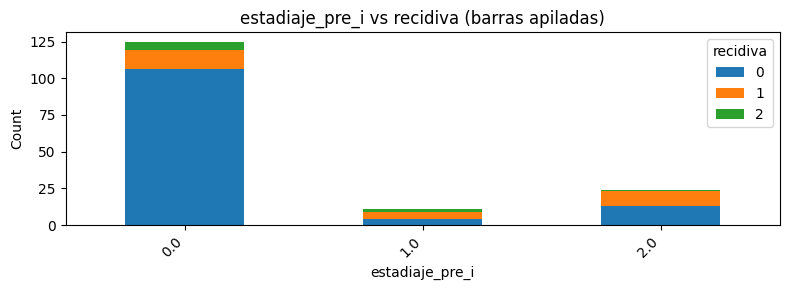

recidiva,0,1,2
asa,,,
0.0000,8,0,1
1.0000,78,17,3
2.0000,29,7,1


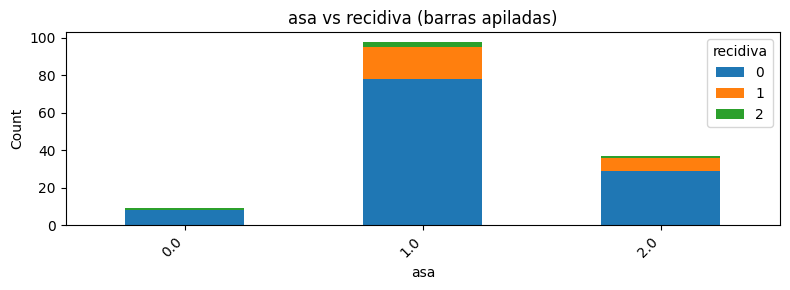

recidiva,0,1,2
histo_defin,,,
1.0000,5,0,0
2.0000,99,17,3
3.0000,2,2,1
4.0000,1,1,0
5.0000,1,0,0
6.0000,2,1,0
7.0000,0,1,0
8.0000,1,3,0
9.0000,5,4,2


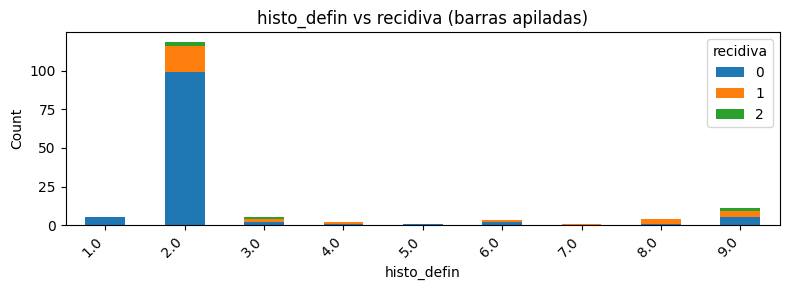

recidiva,0,1,2
grado_histologi,,,
1.0000,99,12,4
2.0000,11,17,2


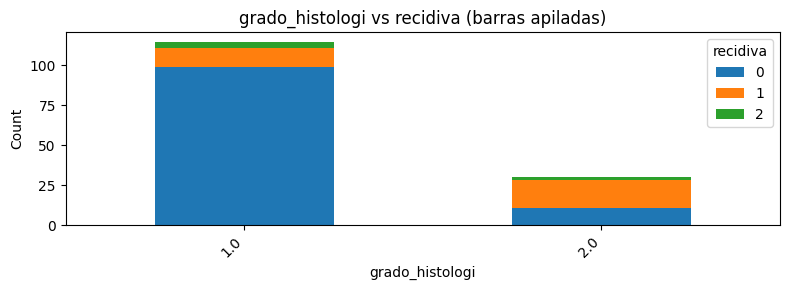

recidiva,0,1,2
afectacion_linf,,,
0.0000,99,11,4
1.0000,12,16,2


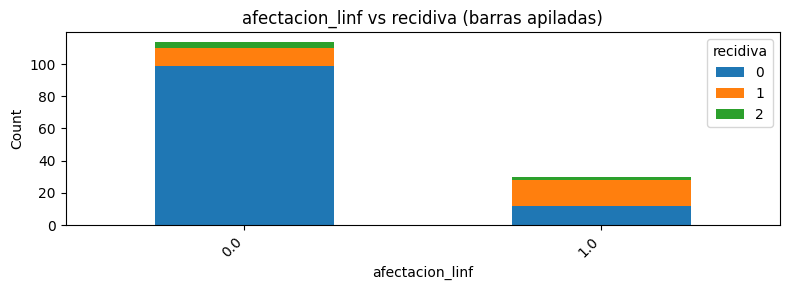

recidiva,0,1,2
AP_centinela_pelvico,,,
0.0000,36,1,0
1.0000,1,1,0
2.0000,1,0,0
3.0000,1,0,0
4.0000,64,22,5


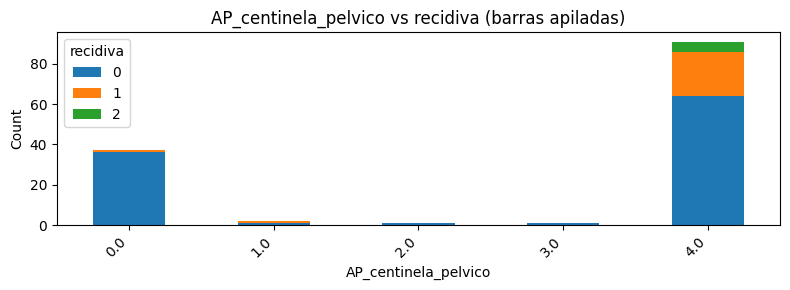

recidiva,0,1,2
AP_ganPelv,,,
0.0000,29,14,1
1.0000,1,0,0
3.0000,3,7,0


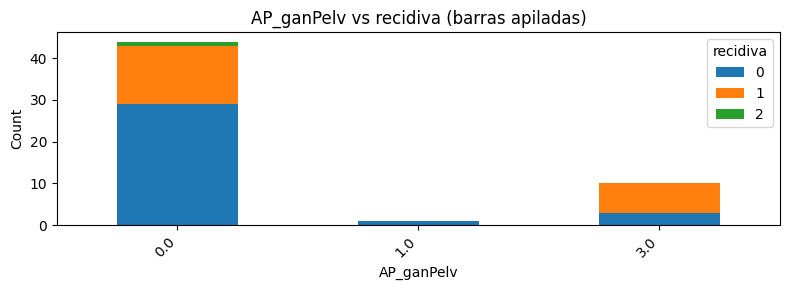

recidiva,0,1
AP_glanPaor,,
0.0000,12,12
1.0000,1,0
2.0000,0,1
3.0000,2,4


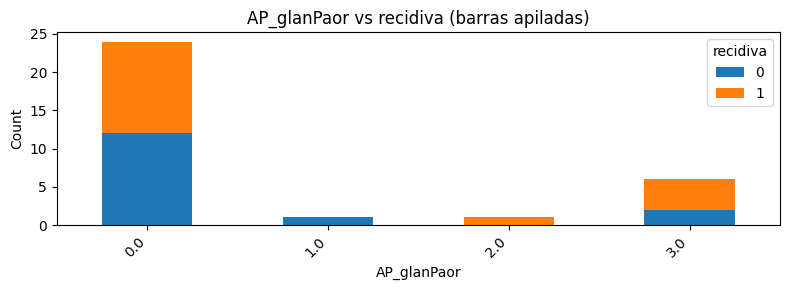

recidiva,0,1,2
estudio_genetico_r01,,,
0.0000,114,26,7
1.0000,7,0,0


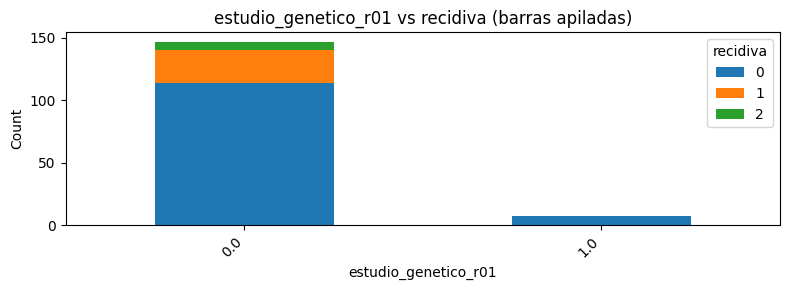

recidiva,0,1,2
estudio_genetico_r02,,,
0.0000,121,25,7
1.0000,0,1,0


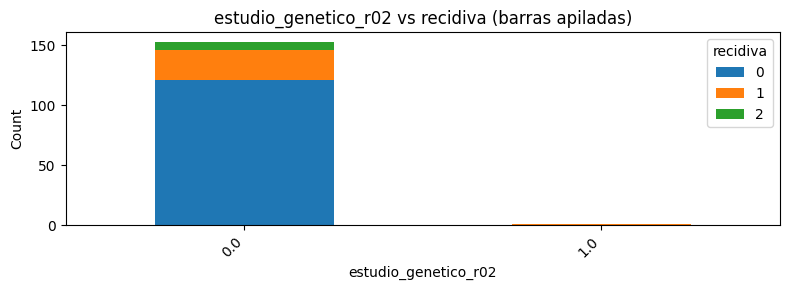

recidiva,0,1,2
estudio_genetico_r03,,,
0.0000,121,25,7
1.0000,0,1,0


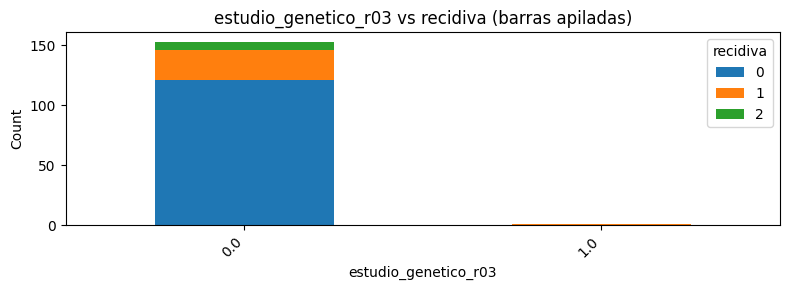

recidiva,0,1,2
estudio_genetico_r04,,,
0.0000,120,26,7
1.0000,1,0,0


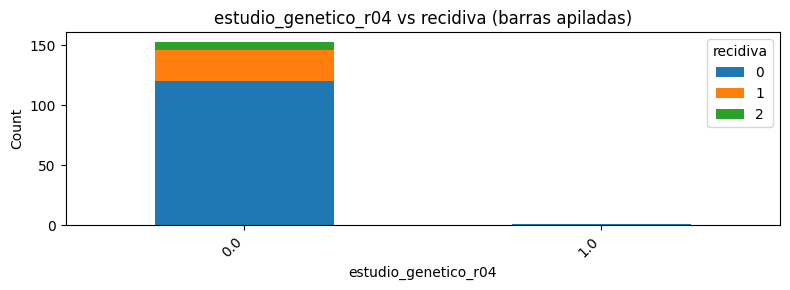

recidiva,0,1,2
estudio_genetico_r05,,,
0.0000,120,24,7
1.0000,1,2,0


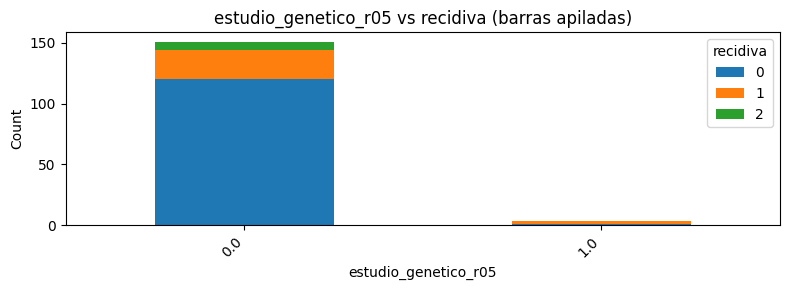

recidiva,0,1,2
estudio_genetico_r06,,,
0.0000,7,3,0
1.0000,114,23,7


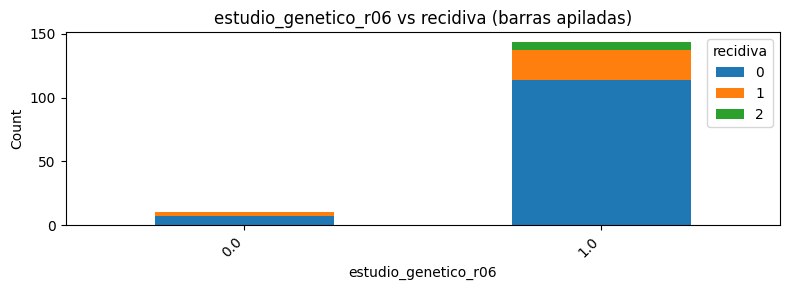

recidiva,0,1,2
estadificacion_,,,
1.0000,78,5,3
2.0000,13,5,0
3.0000,3,3,0
4.0000,2,0,0
5.0000,0,1,2
6.0000,3,3,0
7.0000,4,3,0
8.0000,0,4,0
9.0000,3,4,0


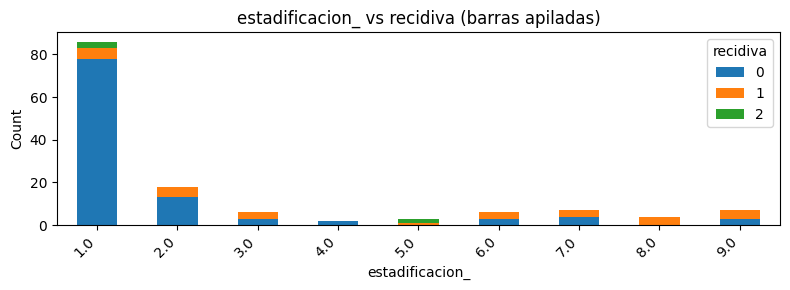

recidiva,0,1,2
FIGO2023,,,
1.0000,73,4,4
2.0000,9,1,0
4.0000,11,5,0
6.0000,2,1,0
7.0000,2,1,1
8.0000,1,0,0
9.0000,3,0,0
10.0000,0,1,1
11.0000,7,6,0


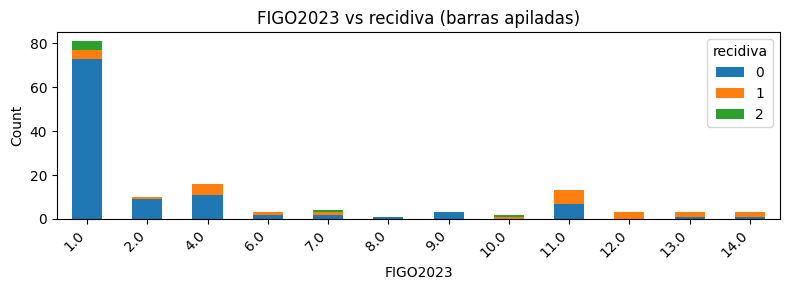

recidiva,0,1,2
grupo_de_riesgo_definitivo,,,
1.0000,81,3,3
2.0000,12,4,0
3.0000,6,4,0
4.0000,9,7,2
5.0000,4,8,0


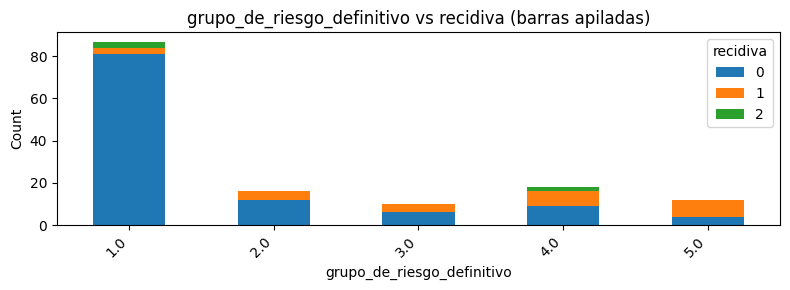

recidiva,0,1,2
tto_NA,,,
0,123,28,9
1,2,1,0


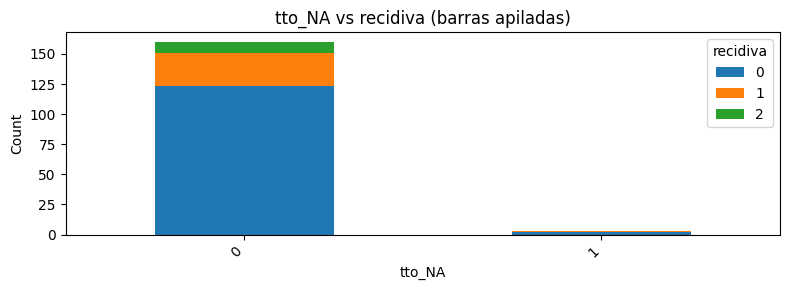

recidiva,0,1,2
tto_1_quirugico,,,
0.0000,13,6,3
1.0000,110,21,6


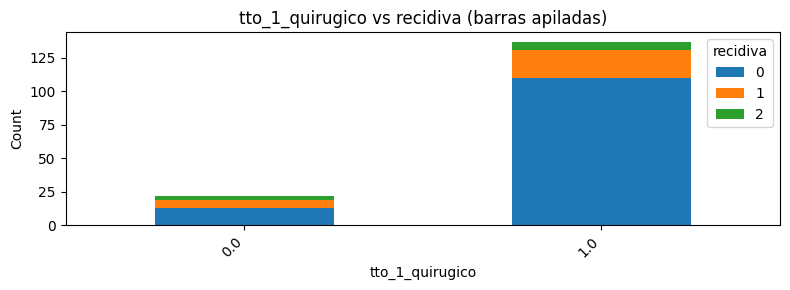

recidiva,0,1,2
Tributaria_a_Radioterapia,,,
0.0000,101,12,6
1.0000,18,17,1


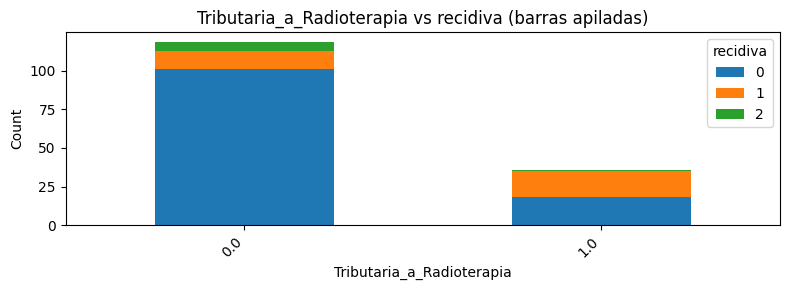

recidiva,0,1,2
bqt,,,
0.0000,92,13,6
1.0000,27,15,1


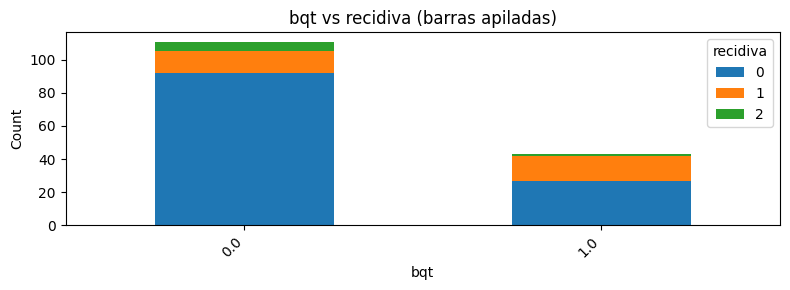

recidiva,0,1,2
qt,,,
0.0000,102,13,6
1.0000,15,16,1


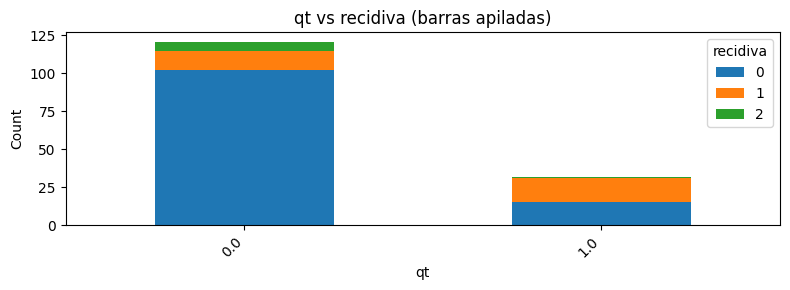

recidiva,0,1,2
est_pcte,,,
1,109,16,6
2,16,11,0
3,0,2,3


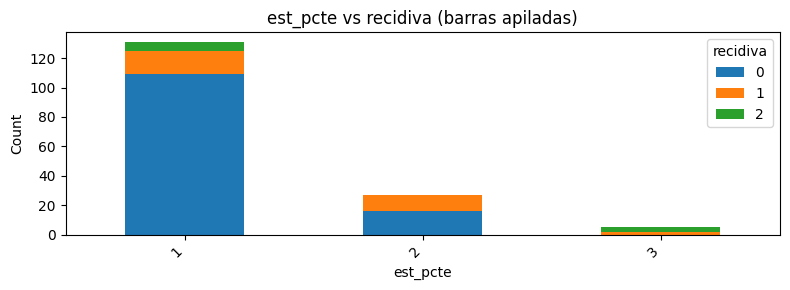

recidiva,0,1
causa_muerte,,
0.0000,5,8
1.0000,11,3


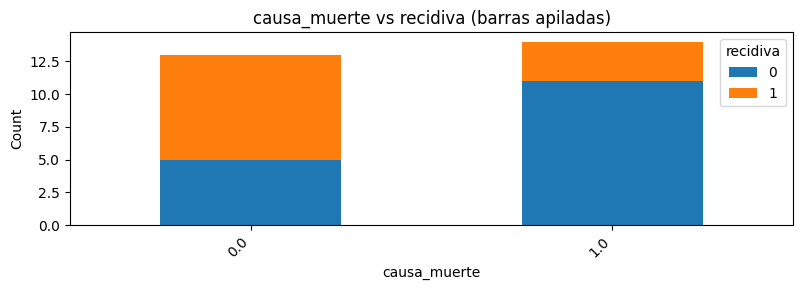

recidiva,0,1,2
libre_enferm,,,
0,12,22,0
1,103,5,0
2,10,2,9


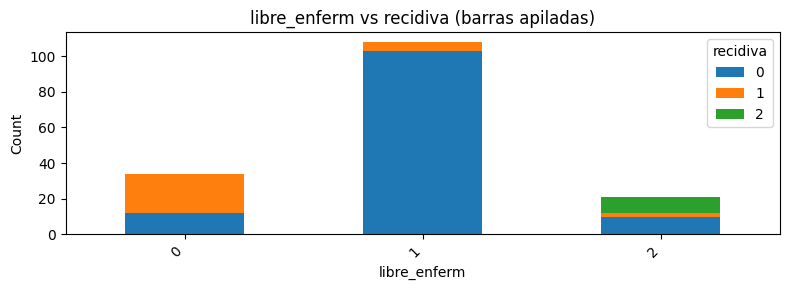

recidiva,1
dx_recidiva,
0.0000,3
1.0000,26


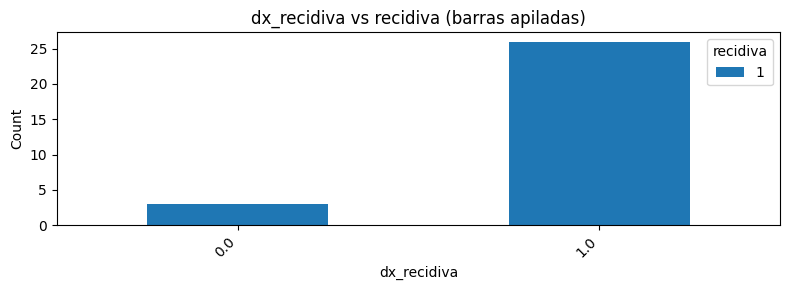

recidiva,0,1
loc_recidiva_r01,,
0.0000,2,13
1.0000,0,16


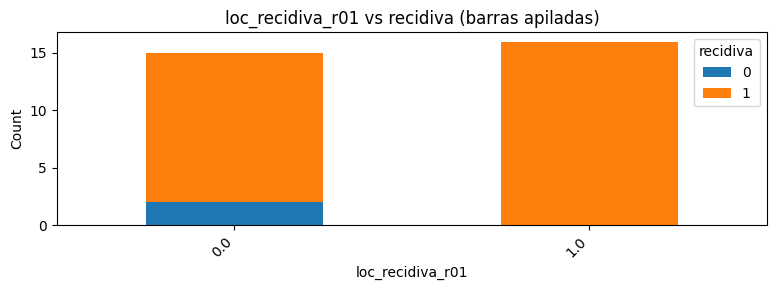

recidiva,0,1
loc_recidiva_r02,,
0.0000,2,21
1.0000,0,8


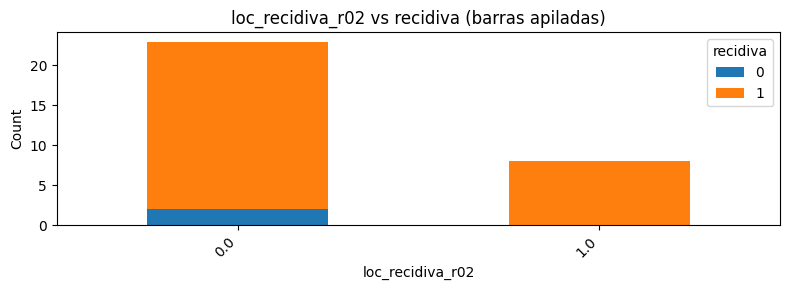

recidiva,0,1
loc_recidiva_r03,,
0.0000,2,10
1.0000,0,19


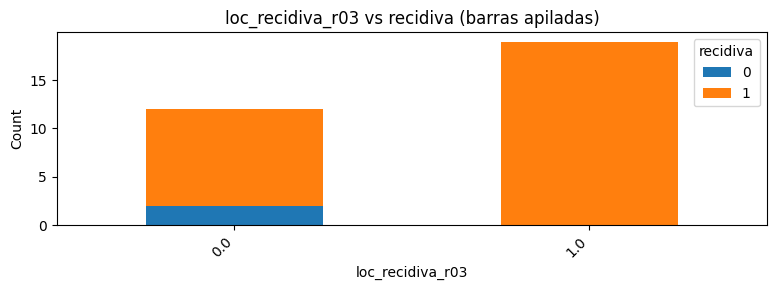

recidiva,0,1
loc_recidiva_r04,,
0.0000,2,29


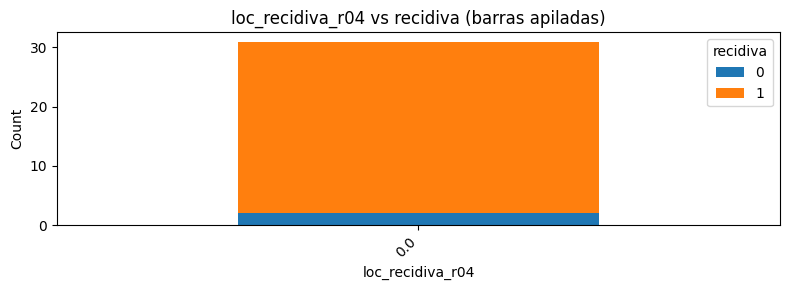

recidiva,0,1
loc_recidiva_r05,,
0.0000,2,29


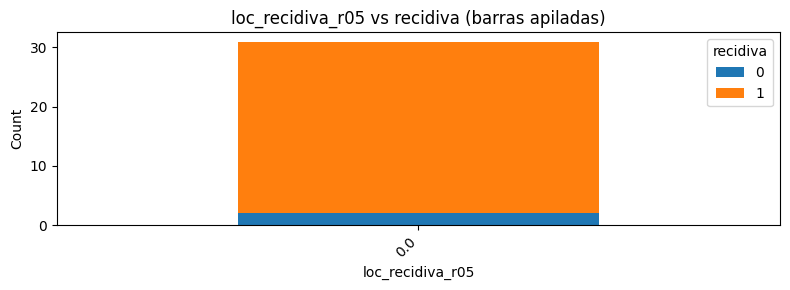

recidiva,0,1
loc_recidiva_r06,,
0.0000,2,28
1.0000,0,1


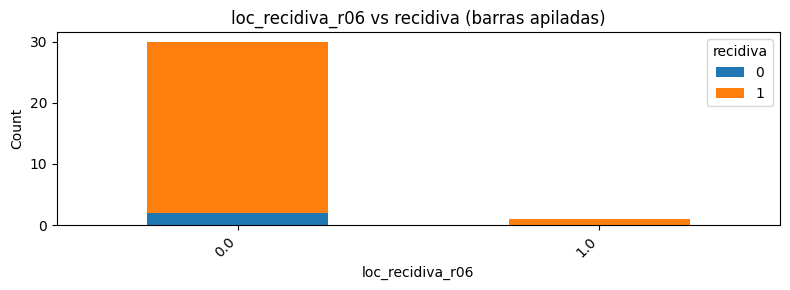

recidiva,1
tto_recidiva,
0.0000,2
1.0000,11
2.0000,16


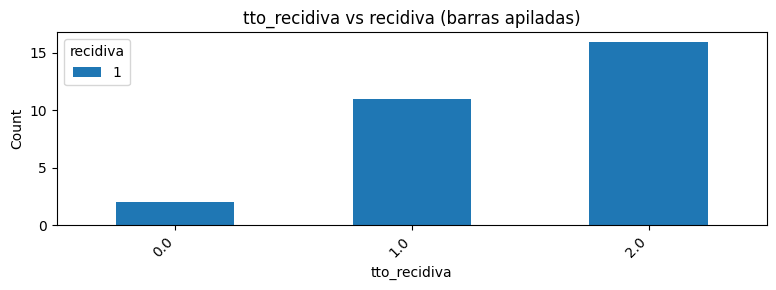

recidiva,1
Tt_recidiva_qx,
0.0000,14
1.0000,14
2.0000,1


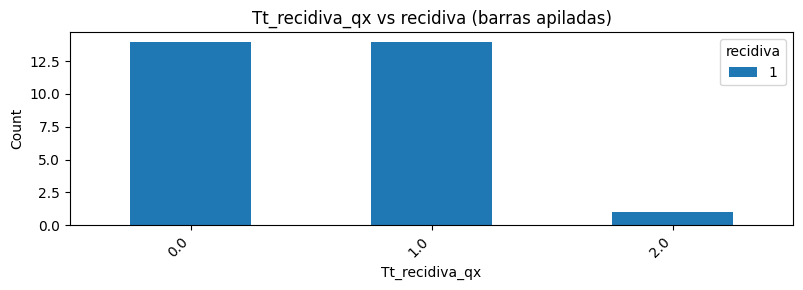

recidiva,1
Reseccion_macroscopica_complet,
0.0000,14
1.0000,13


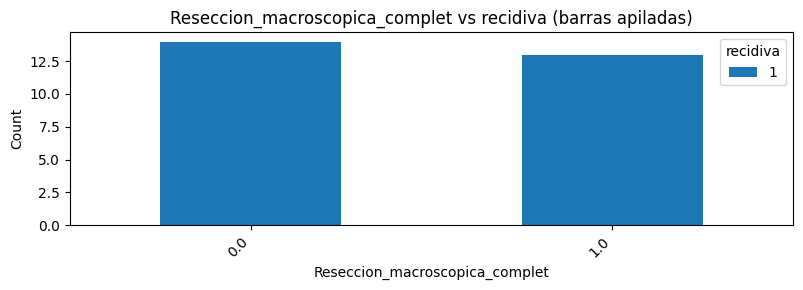

recidiva,1
Tratamiento_RT,
0.0000,20
1.0000,8


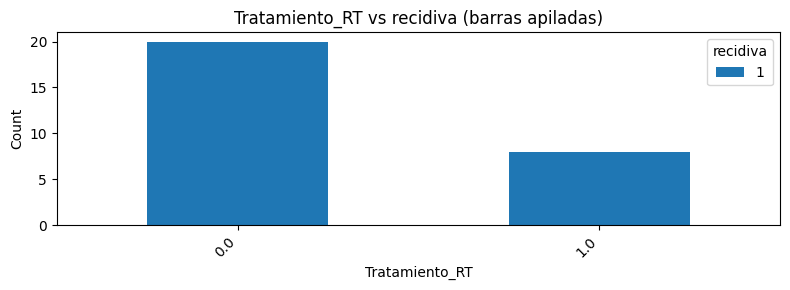

recidiva,1
Tratamiento_sistemico,
0.0000,14
1.0000,15


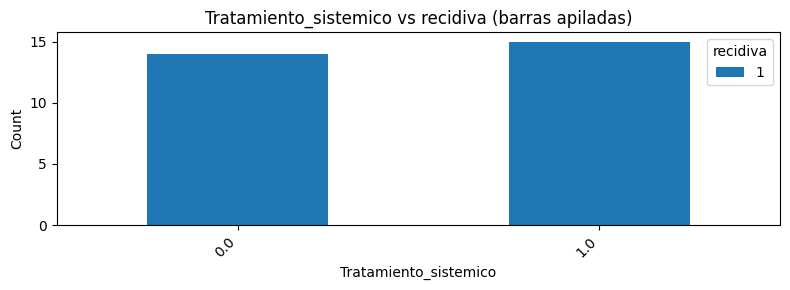

In [22]:
# 5.2 Categóricas vs recidiva

results_cat = []

for c in cat_cols:
    if c == "recidiva":
        continue

    tmp = df[[c, "recidiva"]].dropna()
    if tmp.empty:
        continue

    ct = pd.crosstab(tmp[c], tmp["recidiva"])
    display(ct.head(20))

    plt.figure(figsize=(8, 3))
    ct.plot(kind="bar", stacked=True, ax=plt.gca())
    plt.title(f"{c} vs recidiva (barras apiladas)")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    try:
        import scipy.stats as ss
        chi2, p, dof, expected = ss.chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
    except Exception:
        chi2, p, dof, v = np.nan, np.nan, np.nan, np.nan

    results_cat.append({
        "variable": c,
        "n": int(tmp.shape[0]),
        "chi2": chi2,
        "dof": dof,
        "p_chi2": p,
        "cramers_v": v,
        "n_levels": int(tmp[c].nunique(dropna=True))
    })

## 6) Correlaciones (solo numéricas)
Matriz de correlación Pearson entre variables numéricas definidas en `variables_numericas`.

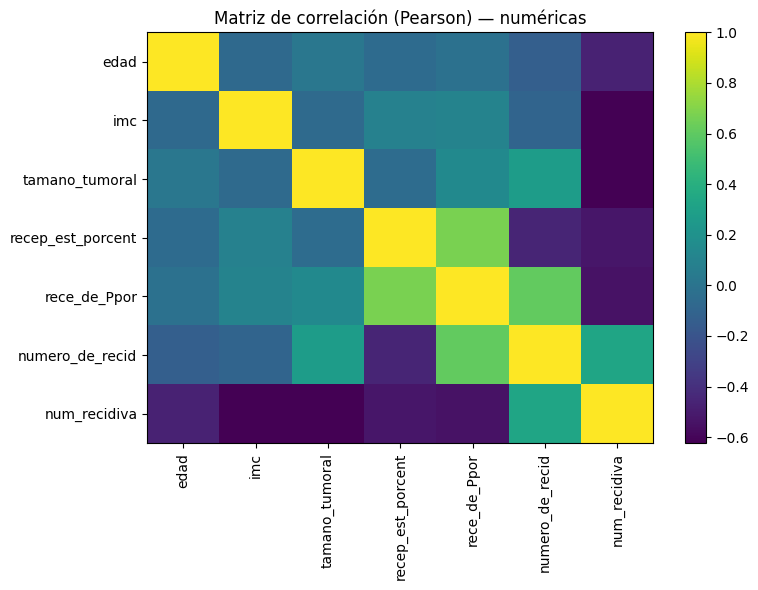

rece_de_Ppor       recep_est_porcent   0.6710
recep_est_porcent  rece_de_Ppor        0.6710
imc                num_recidiva        0.6227
num_recidiva       imc                 0.6227
                   tamano_tumoral      0.6210
tamano_tumoral     num_recidiva        0.6210
numero_de_recid    rece_de_Ppor        0.6090
rece_de_Ppor       numero_de_recid     0.6090
                   num_recidiva        0.5443
num_recidiva       rece_de_Ppor        0.5443
                   recep_est_porcent   0.5229
recep_est_porcent  num_recidiva        0.5229
num_recidiva       edad                0.4674
edad               num_recidiva        0.4674
numero_de_recid    recep_est_porcent   0.4566
dtype: float64

In [23]:
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Matriz de correlación (Pearson) — numéricas")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

corr_abs = corr.abs().where(~np.eye(len(num_cols), dtype=bool))
top = corr_abs.stack().sort_values(ascending=False).head(15)
display(top)

# Preprocesamiento de Datos - Cáncer de Endometrio

Este notebook realiza la limpieza e imputación de los datos del estudio.

In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

def limpiar_e_imputar_datos(input_file, output_file):
    # Cargar los datos
    df = pd.read_csv(input_file)
    print(f"Datos originales cargados: {df.shape}")

    # ---------------------------------------------------------
    # 1. ELIMINACIÓN DE FILAS CON MISSINGS EN GENÉTICA
    # ---------------------------------------------------------

    # estudio_genetico (todos): Quitar individuos con missing en estas columnas
    cols_genetica = [c for c in df.columns if 'estudio_genetico' in c.lower()]
    if cols_genetica:
        df.dropna(subset=cols_genetica, inplace=True)
        print(f"Filas tras eliminar missings en genética: {df.shape[0]}")

    # ---------------------------------------------------------
    # 2. TRANSFORMACIÓN DE VARIABLES (LÓGICA)
    # ---------------------------------------------------------

    # Exitus: Ya está en el dataset
    # Si hubiera causa_muerte, aplicaríamos lógica aquí
    # Por ahora, dejamos Exitus como está
    pass

    # ---------------------------------------------------------
    # 3. IMPUTACIONES CONSTANTES (A VALOR FIJO)
    # ---------------------------------------------------------

    # Imputar a 0 (variables que no existen o son fechas)
    cols_a_cero = [
        'f_diag', 
        'grupo_riesgo', 
        'grupo_de_riesgo_definitivo',
        'fecha_qx', 
        'histo_defin', 
        'grado_histologi', 
        'FIGO2023', 
        'num_recidiva',
        'numero_de_recid',
        'DFS',
        'OS_Days',
        'f_muerte',
        'Tt_recidiva_qx'
    ]
    for col in cols_a_cero:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    # Imputaciones específicas
    imputaciones_especificas = {
        'asa': 2,  # ASA II es lo más común
        'AP_centinela_pelvico': 2,  # No realizado
        'AP_ganPelv': 2,  # No realizado
        'AP_glanPaor': 2,  # No realizado
        'Tributaria_a_Radioterapia': 0,  # No
        'bqt': 0,  # No realizado
        'qt': 0,  # No realizado
        'dx_recidiva': 0,  # No recidiva
        'tto_NA': 0  # Sin tratamiento neoadyuvante
    }
    for col, valor in imputaciones_especificas.items():
        if col in df.columns:
            df[col] = df[col].fillna(valor)

    # ---------------------------------------------------------
    # 4. IMPUTACIÓN POR MODA
    # ---------------------------------------------------------
    cols_moda = ['infiltracion_mi', 'metasta_distan', 'estadiaje_pre_i', 'est_pcte', 'libre_enferm']
    for col in cols_moda:
        if col in df.columns and df[col].notna().sum() > 0:
            moda = df[col].mode()
            if len(moda) > 0:
                df[col] = df[col].fillna(moda[0])

    # ---------------------------------------------------------
    # 5. IMPUTACIÓN KNN (K-Nearest Neighbors)
    # ---------------------------------------------------------
    
    # Función auxiliar para aplicar KNN
    def aplicar_knn(df_in, features, targets, n_neighbors=5):
        # Filtrar features que existen y no tienen todos nulos
        features_validas = [f for f in features if f in df_in.columns and df_in[f].notna().sum() > 0]
        targets_validos = [t for t in targets if t in df_in.columns and df_in[t].isnull().sum() > 0]
        
        if not features_validas or not targets_validos:
            return
        
        subset = df_in[features_validas + targets_validos].copy()
        
        # Solo aplicar si hay suficientes datos
        if subset.notna().all(axis=1).sum() < 5:
            return
        
        imputer = KNNImputer(n_neighbors=min(n_neighbors, subset.notna().all(axis=1).sum()))
        imputed_data = imputer.fit_transform(subset)
        
        # Recuperar las columnas imputadas
        for i, target_col in enumerate(targets_validos):
            col_index = len(features_validas) + i
            valores_imputados = imputed_data[:, col_index]
            
            # Variables categóricas se redondean
            es_categorica = target_col not in ['imc', 'tamano_tumoral', 'OS_Days', 'DFS']
            
            series_imputada = pd.Series(valores_imputados, index=df_in.index)
            if es_categorica:
                series_imputada = series_imputada.round()
            
            df_in[target_col] = df_in[target_col].fillna(series_imputada)

    # a. IMC usando Edad
    aplicar_knn(df, ['edad'], ['imc'])

    # b. ECOTV usando Tipo histológico y Grado
    aplicar_knn(df, ['tipo_histologico', 'Grado'], ['ecotv_infiltsub', 'ecotv_infiltobj'])

    # c. Tamaño tumoral usando Tipo histológico y Grado
    aplicar_knn(df, ['tipo_histologico', 'Grado'], ['tamano_tumoral'])

    # d. Afectación linfática usando tipo y grado
    aplicar_knn(df, ['tipo_histologico', 'Grado'], ['afectacion_linf', 'tto_1_quirugico'])

    # e. Receptores usando Tipo histológico
    aplicar_knn(df, ['tipo_histologico'], ['recep_est_porcent', 'rece_de_Ppor'])

    # f. Recidiva usando variables clínicas
    aplicar_knn(df, ['Grado', 'infiltracion_mi', 'afectacion_linf'], ['recidiva'])

    # ---------------------------------------------------------
    # GUARDAR RESULTADO
    # ---------------------------------------------------------
    print("\n" + "="*80)
    print("Imputación finalizada.")
    print("="*80)
    print(f"Dimensiones finales: {df.shape}")
    print(f"Valores nulos restantes: {df.isnull().sum().sum()}")
    
    # Mostrar variables con missings restantes
    missings_por_col = df.isnull().sum()
    if missings_por_col.sum() > 0:
        print("\nVariables con valores faltantes restantes:")
        for col, count in missings_por_col[missings_por_col > 0].items():
            pct = 100 * count / len(df)
            print(f"  {col}: {count} ({pct:.1f}%)")
    
    df.to_csv(output_file, index=False)
    print(f"\n✓ Archivo guardado como: {output_file}")
    
    return df

# Ejecutar la función
if __name__ == "__main__":
    limpiar_e_imputar_datos('datos_finales_corregidos.csv', 'bbdd_imputed_final.csv')

Datos originales cargados: (163, 62)
Filas tras eliminar missings en genética: 154

Imputación finalizada.
Dimensiones finales: (154, 62)
Valores nulos restantes: 1547

Variables con valores faltantes restantes:
  fecha_de_recidi: 128 (83.1%)
  estadificacion_: 18 (11.7%)
  causa_muerte: 130 (84.4%)
  loc_recidiva_r01: 126 (81.8%)
  loc_recidiva_r02: 126 (81.8%)
  loc_recidiva_r03: 126 (81.8%)
  loc_recidiva_r04: 126 (81.8%)
  loc_recidiva_r05: 126 (81.8%)
  loc_recidiva_r06: 126 (81.8%)
  tto_recidiva: 128 (83.1%)
  Reseccion_macroscopica_complet: 130 (84.4%)
  Tratamiento_RT: 129 (83.8%)
  Tratamiento_sistemico: 128 (83.1%)

✓ Archivo guardado como: bbdd_imputed_final.csv


In [26]:
# Cargar el nuevo CSV imputado
df_nuevo = pd.read_csv('aaa2_imputed_final.csv')
print(f"Dimensiones del dataset procesado: {df_nuevo.shape}")
print(f"\nNúmero de registros: {len(df_nuevo)}")
print(f"Número de variables: {len(df_nuevo.columns)}")

# Análisis de valores faltantes
print("\n" + "="*80)
print("ANÁLISIS DE VALORES FALTANTES - DATASET PROCESADO")
print("="*80)

missing_nuevo = df_nuevo.isnull().sum()
missing_pct_nuevo = (missing_nuevo / len(df_nuevo)) * 100

missing_df_nuevo = pd.DataFrame({
    'Variable': missing_nuevo.index,
    'Missing_Count': missing_nuevo.values,
    'Percentage': missing_pct_nuevo.values
}).sort_values('Missing_Count', ascending=False)

# Mostrar todas las variables con missings
vars_con_missings = missing_df_nuevo[missing_df_nuevo['Missing_Count'] > 0]

if len(vars_con_missings) > 0:
    print(f"\nSe encontraron {len(vars_con_missings)} variables con valores faltantes:")
    print(vars_con_missings.to_string(index=False))
    
    print(f"\n📊 Resumen:")
    print(f"   Total de valores faltantes: {missing_nuevo.sum()}")
    print(f"   Porcentaje total de datos faltantes: {(missing_nuevo.sum() / (len(df_nuevo) * len(df_nuevo.columns)) * 100):.2f}%")
    
    # Visualización
    plt.figure(figsize=(14, max(6, len(vars_con_missings) * 0.3)))
    plt.barh(vars_con_missings['Variable'], vars_con_missings['Percentage'], color='coral')
    plt.xlabel('Porcentaje de valores faltantes (%)')
    plt.title('Variables con Valores Faltantes - Dataset Procesado')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ ¡Excelente! No hay valores faltantes en el dataset procesado.")

# Comparación con el dataset original
print("\n" + "="*80)
print("COMPARACIÓN: ANTES vs DESPUÉS DEL PROCESAMIENTO")
print("="*80)

df_original = pd.read_csv('datos_finales_corregidos.csv')
missing_original = df_original.isnull().sum().sum()
missing_procesado = df_nuevo.isnull().sum().sum()

print(f"\nDataset Original:")
print(f"   Registros: {len(df_original)}")
print(f"   Variables: {len(df_original.columns)}")
print(f"   Valores faltantes: {missing_original}")
print(f"   % datos faltantes: {(missing_original / (len(df_original) * len(df_original.columns)) * 100):.2f}%")

print(f"\nDataset Procesado:")
print(f"   Registros: {len(df_nuevo)}")
print(f"   Variables: {len(df_nuevo.columns)}")
print(f"   Valores faltantes: {missing_procesado}")
print(f"   % datos faltantes: {(missing_procesado / (len(df_nuevo) * len(df_nuevo.columns)) * 100):.2f}%")

print(f"\n📉 Reducción:")
print(f"   Registros eliminados: {len(df_original) - len(df_nuevo)}")
print(f"   Columnas eliminadas: {len(df_original.columns) - len(df_nuevo.columns)}")
print(f"   Valores faltantes reducidos: {missing_original - missing_procesado} ({((missing_original - missing_procesado) / missing_original * 100):.2f}%)")


Dimensiones del dataset procesado: (154, 48)

Número de registros: 154
Número de variables: 48

ANÁLISIS DE VALORES FALTANTES - DATASET PROCESADO

✅ ¡Excelente! No hay valores faltantes en el dataset procesado.

COMPARACIÓN: ANTES vs DESPUÉS DEL PROCESAMIENTO

Dataset Original:
   Registros: 163
   Variables: 62
   Valores faltantes: 3162
   % datos faltantes: 31.29%

Dataset Procesado:
   Registros: 154
   Variables: 48
   Valores faltantes: 0
   % datos faltantes: 0.00%

📉 Reducción:
   Registros eliminados: 9
   Columnas eliminadas: 14
   Valores faltantes reducidos: 3162 (100.00%)
